# BTC Analisis:

### Este archivo:

#### Busca pronosticar las variables del bitcoin en el tiempo. utiliza api https://www.coingecko.com/en/api/documentation, para obtener info de la criptomoneda seleccionada.


### El market_caps:

O "capitalización de mercado" es un término utilizado en el ámbito de las criptomonedas y se refiere al valor total de mercado de una criptomoneda específica en un momento dado. Representa la suma de todos los tokens o monedas de una criptomoneda en circulación multiplicado por el precio actual de cada token.

La capitalización de mercado es una medida importante que se utiliza para evaluar el tamaño y la popularidad de una criptomoneda en comparación con otras. Una capitalización de mercado más alta generalmente indica que una criptomoneda tiene una mayor adopción y valoración en el mercado.

Es importante tener en cuenta que la capitalización de mercado puede fluctuar ampliamente debido a los cambios en el precio de la criptomoneda y en la cantidad de tokens en circulación. También es importante considerar otros factores y métricas al evaluar una criptomoneda, como el volumen de operaciones, la liquidez, la tecnología subyacente y el equipo de desarrollo.

En el contexto del código que proporcionaste, "market_caps" se refiere a los datos de capitalización de mercado históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin.

### Total volumes:

O "volúmenes totales" se refiere al volumen total de transacciones realizadas con una criptomoneda específica en un momento dado. Representa la suma de todos los volúmenes de transacciones en la criptomoneda durante un período de tiempo determinado.

El volumen de transacciones es una métrica importante en el mercado de las criptomonedas, ya que proporciona información sobre la liquidez y la actividad de negociación de una criptomoneda. Un mayor volumen de transacciones generalmente indica una mayor actividad comercial y una mayor liquidez en el mercado, lo que puede ser un indicador de interés y confianza en la criptomoneda.

Es importante tener en cuenta que el volumen de transacciones puede variar ampliamente de un momento a otro y puede influir en la volatilidad de los precios de las criptomonedas. Un alto volumen de transacciones puede indicar una mayor actividad especulativa y comercial, mientras que un bajo volumen puede indicar menor interés o actividad en el mercado.

En el contexto del código que proporcionaste, "total_volumes" se refiere a los datos de volúmenes totales históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin, incluido el volumen total de transacciones.

________________________________________________________

# Api conection to data:

### Monthly data, here we have 1 record per day of the variables

In [348]:
import pandas as pd
import requests

bitcoin_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&precision=full"
bitcoin_response = requests.get(bitcoin_url)
bitcoin_data = bitcoin_response.json()

# Extraer los valores de timestamp de cada lista en la columna 'timestamp'
timestamps = [item[0] for item in bitcoin_data['prices']]

# Crear el dataframe con los datos históricos de Bitcoin
df_bit = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='ms'),
    'prices': [item[1] for item in bitcoin_data['prices']],
    'market_caps': [item[1] for item in bitcoin_data['market_caps']],
    'total_volumes': [item[1] for item in bitcoin_data['total_volumes']]
})

# Mostrar las últimas 50 filas del dataframe
print(df_bit.head(50))
print(df_bit.tail(50))

    timestamp    prices   market_caps  total_volumes
0  2013-04-28  135.3000  1.500518e+09            0.0
1  2013-04-29  141.9600  1.575032e+09            0.0
2  2013-04-30  135.3000  1.501657e+09            0.0
3  2013-05-01  117.0000  1.298952e+09            0.0
4  2013-05-02  103.4300  1.148668e+09            0.0
5  2013-05-03   91.0100  1.011066e+09            0.0
6  2013-05-04  111.2500  1.236352e+09            0.0
7  2013-05-05  116.7900  1.298378e+09            0.0
8  2013-05-06  118.3300  1.315992e+09            0.0
9  2013-05-07  106.4000  1.183766e+09            0.0
10 2013-05-08  112.6400  1.253655e+09            0.0
11 2013-05-09  113.0000  1.258131e+09            0.0
12 2013-05-10  118.7800  1.322989e+09            0.0
13 2013-05-11  113.0100  1.259239e+09            0.0
14 2013-05-12  114.7130  1.278709e+09            0.0
15 2013-05-13  117.1800  1.306721e+09            0.0
16 2013-05-14  114.5000  1.277279e+09            0.0
17 2013-05-15  114.1560  1.273850e+09         

In [349]:
# Ordenamos los datos, por posibles desordenes internos
df_bit = df_bit.sort_values(by='timestamp').reset_index(drop=True)
df_bit.head()
# Ahora df_sorted contendrá el DataFrame ordenado por la columna "timestamp" en orden ascendente


timestamp  prices   market_caps  total_volumes
0 2013-04-28  135.30  1.500518e+09            0.0
1 2013-04-29  141.96  1.575032e+09            0.0
2 2013-04-30  135.30  1.501657e+09            0.0
3 2013-05-01  117.00  1.298952e+09            0.0
4 2013-05-02  103.43  1.148668e+09            0.0

In [350]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3734 entries, 0 to 3733
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      3734 non-null   datetime64[ns]
 1   prices         3734 non-null   float64       
 2   market_caps    3733 non-null   float64       
 3   total_volumes  3734 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 116.8 KB


In [351]:
df_bit.isnull().sum()

timestamp        0
prices           0
market_caps      1
total_volumes    0
dtype: int64

In [352]:
df_bit = df_bit.dropna()

In [353]:
df_bit.drop_duplicates()

timestamp        prices   market_caps  total_volumes
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00
...                  ...           ...           ...            ...
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09

[3733 rows x 4 columns]

In [354]:
df_bit.describe()

timestamp        prices   market_caps  \
count                           3733   3733.000000  3.733000e+03   
mean   2018-06-09 10:27:02.817395456  11889.958074  2.208372e+11   
min              2013-04-28 00:00:00     67.809000  7.713681e+08   
25%              2015-11-19 00:00:00    567.381062  7.304054e+09   
50%              2018-06-10 00:00:00   6328.554760  1.091672e+11   
75%              2020-12-29 00:00:00  17106.505149  3.253115e+11   
max              2023-07-19 13:26:13  67617.015545  1.278798e+12   
std                              NaN  15584.897614  2.953450e+11   

       total_volumes  
count   3.733000e+03  
mean    1.413437e+10  
min     0.000000e+00  
25%     1.305731e+08  
50%     3.554701e+09  
75%     2.428211e+10  
max     1.788941e+11  
std     1.843966e+10

In [355]:
import seaborn as sns

In [356]:
# sns.pairplot(df_bit)

### Fin de la revision de los datos.

____________________________________________________________________________________________________________________________________________________

# Transpuesta

In [357]:
df_bit_t = df_bit.T

In [358]:
df_bit_t

0                    1                    2     \
timestamp      2013-04-28 00:00:00  2013-04-29 00:00:00  2013-04-30 00:00:00   
prices                       135.3               141.96                135.3   
market_caps           1500517590.0         1575032004.0         1501657493.0   
total_volumes                  0.0                  0.0                  0.0   

                              3                    4                    5     \
timestamp      2013-05-01 00:00:00  2013-05-02 00:00:00  2013-05-03 00:00:00   
prices                       117.0               103.43                91.01   
market_caps           1298951550.0         1148667722.0         1011066494.0   
total_volumes                  0.0                  0.0                  0.0   

                              6                    7                    8     \
timestamp      2013-05-04 00:00:00  2013-05-05 00:00:00  2013-05-06 00:00:00   
prices                      111.25               116.79               118.33   
market_caps           1236351844.0         1298377788.0         1315992304.0   
total_volumes                  0.0                  0.0                  0.0   

                              9     ...                 3724  \
timestamp      2013-05-07 00:00:00  ...  2023-07-11 00:00:00   
prices                       106.4  ...         30394.281146   
market_caps           1183766500.0  ...  590311894648.751831   
total_volumes                  0.0  ...   12835219756.965891   

                              3725                 3726                 3727  \
timestamp      2023-07-12 00:00:00  2023-07-13 00:00:00  2023-07-14 00:00:00   
prices                30620.814247         30407.416314         31446.014971   
market_caps    594749192359.135132  590629381260.711426  610725509598.846436   
total_volumes   11753418050.421658   13072555444.262321   21254274345.702217   

                              3728                 3729                 3730  \
timestamp      2023-07-15 00:00:00  2023-07-16 00:00:00  2023-07-17 00:00:00   
prices                30311.827808           30297.9714         30237.334785   
market_caps     588107447250.13269  588642134563.520386  586391434733.715332   
total_volumes   21977151420.853252    6233916918.782722    8356410453.563714   

                              3731                 3732                 3733  
timestamp      2023-07-18 00:00:00  2023-07-19 00:00:00  2023-07-19 13:26:13  
prices                30147.860079         29848.032273          29894.48158  
market_caps    585500720965.111328  579708613537.516479  580636097163.186768  
total_volumes   10974383371.546566   13152758553.030825    9515054998.177967  

[4 rows x 3733 columns]

In [359]:
# Almacenar los índices en una variable
indices = df_bit_t.index

In [360]:
# Almacenar los nombres de las filas en una variable
df_bit_t_row_names = df_bit_t.index

# Eliminar los nombres de las filas del índice del DataFrame
df_bit_t.reset_index(drop=True, inplace=True)

# Imprimir los nombres de las filas
print(df_bit_t_row_names)

Index(['timestamp', 'prices', 'market_caps', 'total_volumes'], dtype='object')


In [361]:
df_bit_t

0                    1                    2     \
0  2013-04-28 00:00:00  2013-04-29 00:00:00  2013-04-30 00:00:00   
1                135.3               141.96                135.3   
2         1500517590.0         1575032004.0         1501657493.0   
3                  0.0                  0.0                  0.0   

                  3                    4                    5     \
0  2013-05-01 00:00:00  2013-05-02 00:00:00  2013-05-03 00:00:00   
1                117.0               103.43                91.01   
2         1298951550.0         1148667722.0         1011066494.0   
3                  0.0                  0.0                  0.0   

                  6                    7                    8     \
0  2013-05-04 00:00:00  2013-05-05 00:00:00  2013-05-06 00:00:00   
1               111.25               116.79               118.33   
2         1236351844.0         1298377788.0         1315992304.0   
3                  0.0                  0.0                  0.0   

                  9     ...                 3724                 3725  \
0  2013-05-07 00:00:00  ...  2023-07-11 00:00:00  2023-07-12 00:00:00   
1                106.4  ...         30394.281146         30620.814247   
2         1183766500.0  ...  590311894648.751831  594749192359.135132   
3                  0.0  ...   12835219756.965891   11753418050.421658   

                  3726                 3727                 3728  \
0  2023-07-13 00:00:00  2023-07-14 00:00:00  2023-07-15 00:00:00   
1         30407.416314         31446.014971         30311.827808   
2  590629381260.711426  610725509598.846436   588107447250.13269   
3   13072555444.262321   21254274345.702217   21977151420.853252   

                  3729                 3730                 3731  \
0  2023-07-16 00:00:00  2023-07-17 00:00:00  2023-07-18 00:00:00   
1           30297.9714         30237.334785         30147.860079   
2  588642134563.520386  586391434733.715332  585500720965.111328   
3    6233916918.782722    8356410453.563714   10974383371.546566   

                  3732                 3733  
0  2023-07-19 00:00:00  2023-07-19 13:26:13  
1         29848.032273          29894.48158  
2  579708613537.516479  580636097163.186768  
3   13152758553.030825    9515054998.177967  

[4 rows x 3733 columns]

In [362]:
# Almacenar la primera fila en una variable
primera_fila = df_bit_t.iloc[0]

# Eliminar la primera fila del DataFrame
df_bit_t = df_bit_t.iloc[1:]

print(primera_fila)

0       2013-04-28 00:00:00
1       2013-04-29 00:00:00
2       2013-04-30 00:00:00
3       2013-05-01 00:00:00
4       2013-05-02 00:00:00
               ...         
3729    2023-07-16 00:00:00
3730    2023-07-17 00:00:00
3731    2023-07-18 00:00:00
3732    2023-07-19 00:00:00
3733    2023-07-19 13:26:13
Name: 0, Length: 3733, dtype: object


In [363]:
df_bit_t

0             1             2             3             4     \
1         135.3        141.96         135.3         117.0        103.43   
2  1500517590.0  1575032004.0  1501657493.0  1298951550.0  1148667722.0   
3           0.0           0.0           0.0           0.0           0.0   

           5             6             7             8             9     ...  \
1         91.01        111.25        116.79        118.33         106.4  ...   
2  1011066494.0  1236351844.0  1298377788.0  1315992304.0  1183766500.0  ...   
3           0.0           0.0           0.0           0.0           0.0  ...   

                  3724                 3725                 3726  \
1         30394.281146         30620.814247         30407.416314   
2  590311894648.751831  594749192359.135132  590629381260.711426   
3   12835219756.965891   11753418050.421658   13072555444.262321   

                  3727                3728                 3729  \
1         31446.014971        30311.827808           30297.9714   
2  610725509598.846436  588107447250.13269  588642134563.520386   
3   21254274345.702217  21977151420.853252    6233916918.782722   

                  3730                 3731                 3732  \
1         30237.334785         30147.860079         29848.032273   
2  586391434733.715332  585500720965.111328  579708613537.516479   
3    8356410453.563714   10974383371.546566   13152758553.030825   

                  3733  
1          29894.48158  
2  580636097163.186768  
3    9515054998.177967  

[3 rows x 3733 columns]

_____________________________________________

# 2.0 Regresión Lineal: codigo anterior.. 

In [364]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [365]:
# Opcion 2: - CONECTADA - OK
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

# Filtrar los últimos 45 días
last_45_days = df_bit[-253:].copy()

# Convertir la columna 'timestamp' al formato de fecha y hora
last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# Dividir los datos en características (X) y variable objetivo (y)
X = last_45_days[['days']]
y_prices = last_45_days['prices']
y_market_caps = last_45_days['market_caps']
y_total_volumes = last_45_days['total_volumes']

#___________________________________________________________________________________________________________
# # Normalizar las características (X)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_prices_train, y_prices_test, y_market_caps_train, y_market_caps_test, y_total_volumes_train, y_total_volumes_test = train_test_split(X, y_prices, y_market_caps, y_total_volumes, test_size=0.3, random_state=42)

# Crear un modelo de regresión lineal para cada variable
model_prices = LinearRegression()
model_market_caps = LinearRegression()
model_total_volumes = LinearRegression()

# Ajustar los modelos a los datos de entrenamiento
model_prices.fit(X_train, y_prices_train)
model_market_caps.fit(X_train, y_market_caps_train)
model_total_volumes.fit(X_train, y_total_volumes_train)

# Realizar predicciones para los datos de prueba
y_prices_pred = model_prices.predict(X_test)
y_market_caps_pred = model_market_caps.predict(X_test)
y_total_volumes_pred = model_total_volumes.predict(X_test)

# Calcular métricas de rendimiento para cada modelo
mse_prices = mean_squared_error(y_prices_test, y_prices_pred)
mse_market_caps = mean_squared_error(y_market_caps_test, y_market_caps_pred)
mse_total_volumes = mean_squared_error(y_total_volumes_test, y_total_volumes_pred)

r2_prices = r2_score(y_prices_test, y_prices_pred)
r2_market_caps = r2_score(y_market_caps_test, y_market_caps_pred)
r2_total_volumes = r2_score(y_total_volumes_test, y_total_volumes_pred)

print("MSE for prices:", mse_prices)
print("MSE for market_caps:", mse_market_caps)
print("MSE for total_volumes:", mse_total_volumes)

print("R-squared for prices:", r2_prices)
print("R-squared for market_caps:", r2_market_caps)
print("R-squared for total_volumes:", r2_total_volumes)


#___________________________________________________________________________________________________________

# Generar valores futuros de días para los próximos 30 días
future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})

# Realizar predicciones de precios, market_caps y total_volumes para los próximos 30 días
future_prices = model_prices.predict(future_days)
future_market_caps = model_market_caps.predict(future_days)
future_total_volumes = model_total_volumes.predict(future_days)

# Calcular desviaciones estándar para cada variable
std_prices = 2229.815617/6
std_market_caps = 4.379837e+10/6
std_total_volumes = 3.940256e+09

# Generar ruido gaussiano para cada variable
noise_prices = np.random.normal(0, std_prices, len(future_prices))
noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# Agregar ruido a los valores pronosticados
future_prices += noise_prices
future_market_caps += noise_market_caps
future_total_volumes += noise_total_volumes

# Crear un DataFrame con los valores proyectados y con ruido
projected_data_with_noise = pd.DataFrame({
    'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(), periods=30, freq='D'),
    'prices': future_prices,
    'market_caps': future_market_caps,
    'total_volumes': future_total_volumes
})

# Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
projected_df = pd.concat([last_45_days, projected_data_with_noise])

# Restablecer los índices
projected_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
print(projected_df)


MSE for prices: 3804481.0909365406
MSE for market_caps: 1.412848368484915e+21
MSE for total_volumes: 1.5721292769461322e+20
R-squared for prices: 0.8234960352530373
R-squared for market_caps: 0.8296303670650197
R-squared for total_volumes: 0.13913108363486437
              timestamp        prices   market_caps  total_volumes  days
0   2022-11-10 00:00:00  15742.444336  3.019638e+11   7.497868e+10   0.0
1   2022-11-11 00:00:00  17594.923500  3.365972e+11   6.520067e+10   1.0
2   2022-11-12 00:00:00  17080.215261  3.259211e+11   4.503033e+10   2.0
3   2022-11-13 00:00:00  16797.987483  3.223306e+11   2.189400e+10   3.0
4   2022-11-14 00:00:00  16344.342316  3.136056e+11   2.041162e+10   4.0
..                  ...           ...           ...            ...   ...
278 2023-08-14 13:26:13  34312.279082  6.541264e+11  -9.268704e+07   NaN
279 2023-08-15 13:26:13  34349.479230  6.538405e+11   1.427615e+10   NaN
280 2023-08-16 13:26:13  33218.956092  6.547245e+11   2.126887e+10   NaN
281 2023-0

In [366]:
X

days
3481     0
3482     1
3483     2
3484     3
3485     4
...    ...
3729   248
3730   249
3731   250
3732   251
3733   251

[253 rows x 1 columns]

In [367]:
projected_df.describe()

timestamp        prices   market_caps  \
count                            283    283.000000  2.830000e+02   
mean   2023-03-30 22:50:34.498233088  24986.875370  4.831946e+11   
min              2022-11-10 00:00:00  15742.444336  3.019638e+11   
25%              2023-01-19 12:00:00  20936.218592  4.034537e+11   
50%              2023-03-31 00:00:00  26501.044442  5.142794e+11   
75%              2023-06-09 12:00:00  29351.025606  5.683337e+11   
max              2023-08-18 13:26:13  34349.479230  6.712113e+11   
std                              NaN   5455.111830  1.068518e+11   

       total_volumes        days  
count   2.830000e+02  253.000000  
mean    2.144258e+10  125.996047  
min    -9.268704e+07    0.000000  
25%     1.196824e+10   63.000000  
50%     1.771967e+10  126.000000  
75%     2.605788e+10  189.000000  
max     7.497868e+10  251.000000  
std     1.325806e+10   73.172198

In [368]:
import pandas as pd

# Suponiendo que ya tienes los datos en el DataFrame llamado projected_df

# Rellenamos los valores faltantes en la columna 'days' con una enumeración incremental
projected_df['days'] = range(len(projected_df))

# Mostramos el DataFrame actualizado
print(projected_df)


              timestamp        prices   market_caps  total_volumes  days
0   2022-11-10 00:00:00  15742.444336  3.019638e+11   7.497868e+10     0
1   2022-11-11 00:00:00  17594.923500  3.365972e+11   6.520067e+10     1
2   2022-11-12 00:00:00  17080.215261  3.259211e+11   4.503033e+10     2
3   2022-11-13 00:00:00  16797.987483  3.223306e+11   2.189400e+10     3
4   2022-11-14 00:00:00  16344.342316  3.136056e+11   2.041162e+10     4
..                  ...           ...           ...            ...   ...
278 2023-08-14 13:26:13  34312.279082  6.541264e+11  -9.268704e+07   278
279 2023-08-15 13:26:13  34349.479230  6.538405e+11   1.427615e+10   279
280 2023-08-16 13:26:13  33218.956092  6.547245e+11   2.126887e+10   280
281 2023-08-17 13:26:13  33539.174276  6.564874e+11   1.105144e+10   281
282 2023-08-18 13:26:13  33674.332299  6.712113e+11   1.440021e+10   282

[283 rows x 5 columns]


In [369]:
projected_df.tail(10)

timestamp        prices   market_caps  total_volumes  days
273 2023-08-09 13:26:13  33685.783818  6.496841e+11   7.705146e+09   273
274 2023-08-10 13:26:13  33579.019417  6.540828e+11   1.169490e+10   274
275 2023-08-11 13:26:13  33088.457271  6.520350e+11   1.170986e+10   275
276 2023-08-12 13:26:13  33472.415397  6.595804e+11   6.060373e+09   276
277 2023-08-13 13:26:13  34078.928126  6.426558e+11   6.902078e+09   277
278 2023-08-14 13:26:13  34312.279082  6.541264e+11  -9.268704e+07   278
279 2023-08-15 13:26:13  34349.479230  6.538405e+11   1.427615e+10   279
280 2023-08-16 13:26:13  33218.956092  6.547245e+11   2.126887e+10   280
281 2023-08-17 13:26:13  33539.174276  6.564874e+11   1.105144e+10   281
282 2023-08-18 13:26:13  33674.332299  6.712113e+11   1.440021e+10   282

_____________________________________________

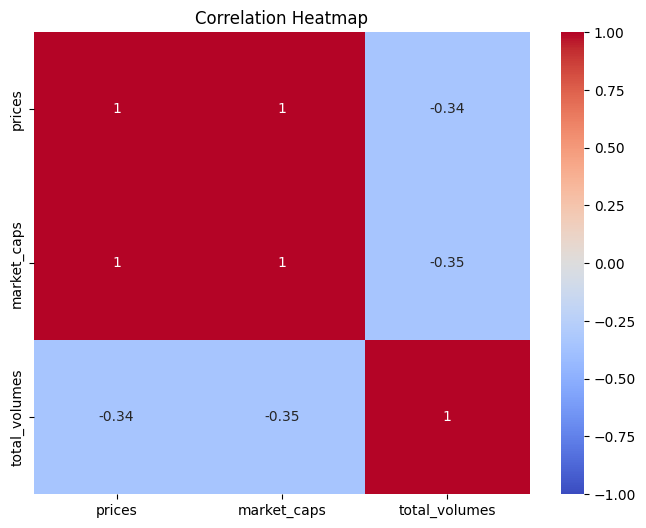

                 prices  market_caps  total_volumes
prices         1.000000     0.999323      -0.344458
market_caps    0.999323     1.000000      -0.347628
total_volumes -0.344458    -0.347628       1.000000


In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el subconjunto de datos que contiene las columnas de interés
subset_df = projected_df[['prices', 'market_caps', 'total_volumes']]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


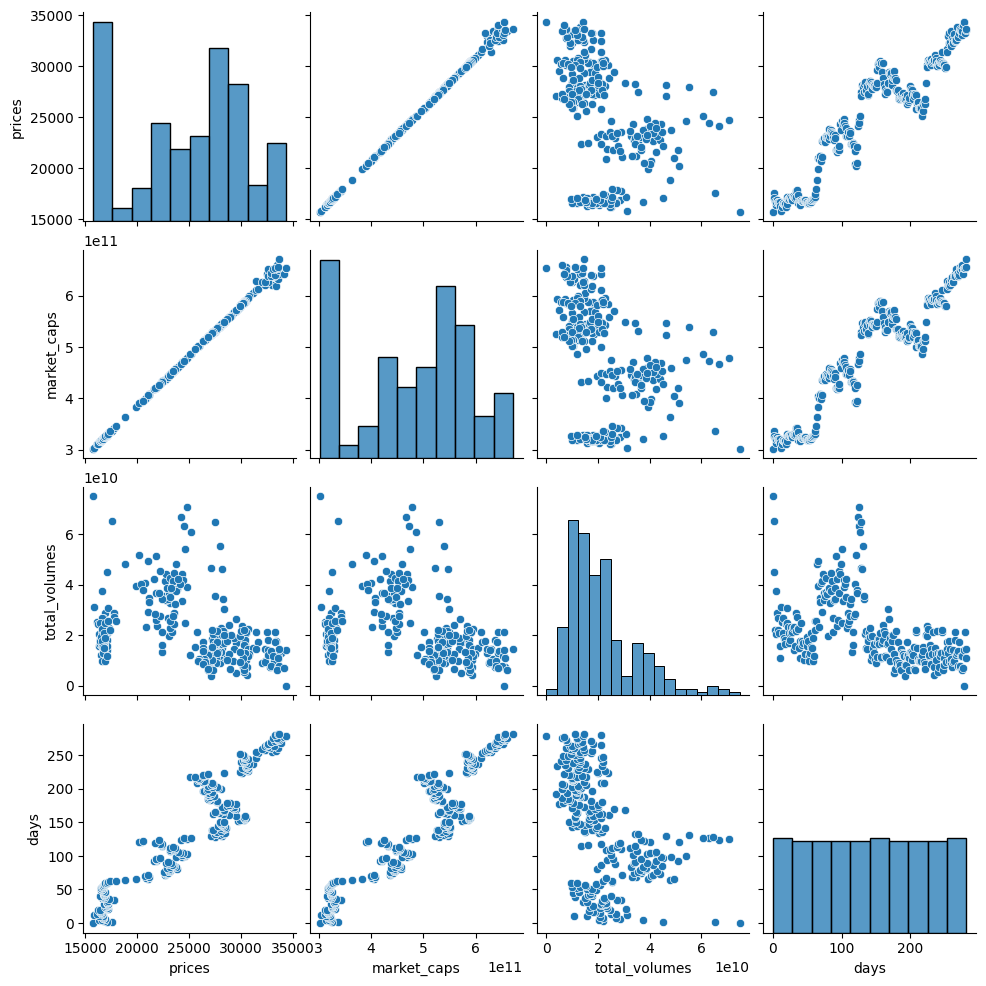

In [371]:
sns.pairplot(projected_df)

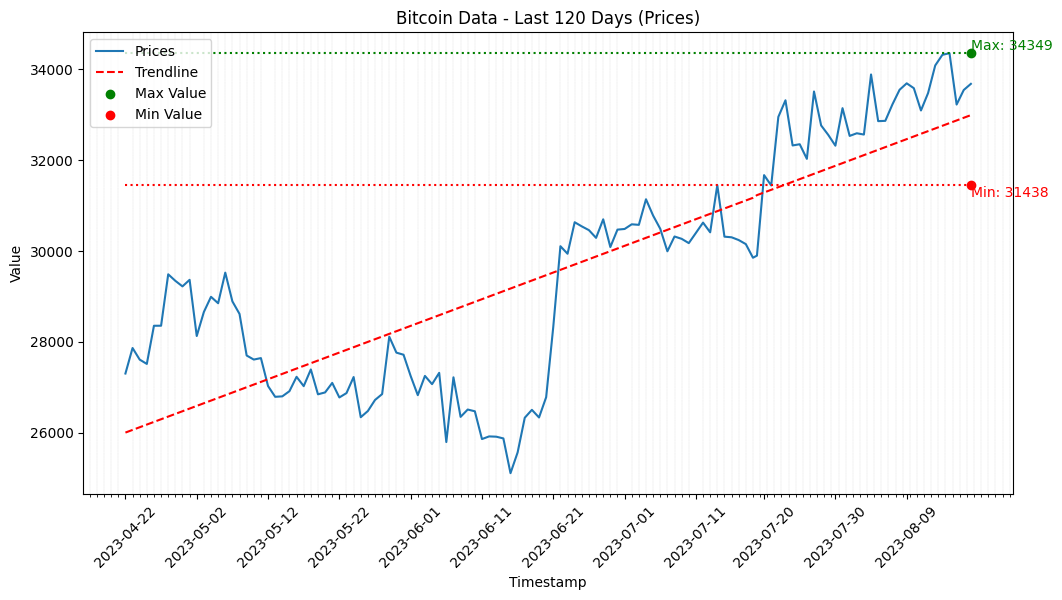

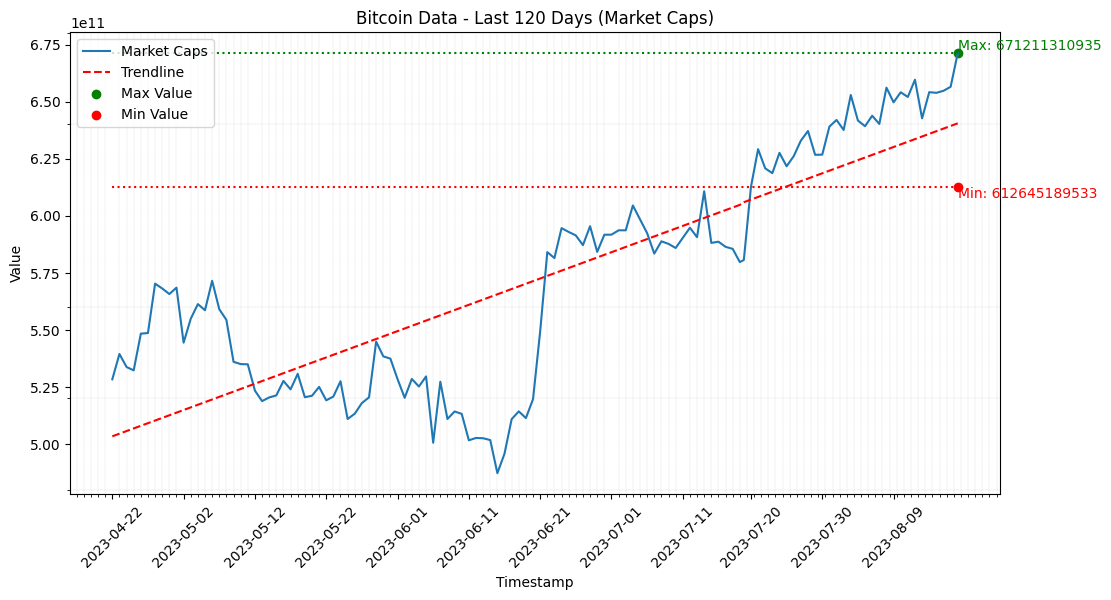

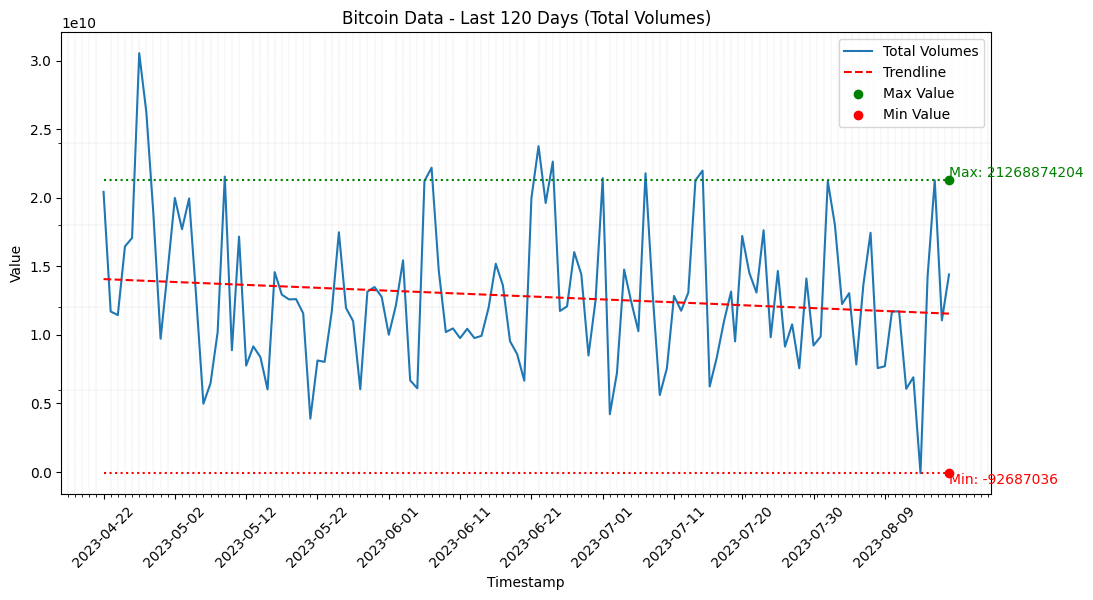

In [372]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()

# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de market_caps
plt.show()

# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de total_volumes
plt.show()


# Fundamental agregar un punto que represente hoy en el grafo de abajo

_____________________________________________

# 2. Regresión lineal múltiple


In [373]:
import numpy as np

In [374]:
X = df_bit[['timestamp','market_caps','total_volumes']]
y = df_bit['prices']

In [375]:
X.tail(3)


timestamp   market_caps  total_volumes
3731 2023-07-18 00:00:00  5.855007e+11   1.097438e+10
3732 2023-07-19 00:00:00  5.797086e+11   1.315276e+10
3733 2023-07-19 13:26:13  5.806361e+11   9.515055e+09

In [376]:
y.tail(3)

3731    30147.860079
3732    29848.032273
3733    29894.481580
Name: prices, dtype: float64

In [377]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2613, 3) (2613,) (1120, 3) (1120,)


In [379]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# Assuming X and y are defined correctly as pandas DataFrames or numpy arrays

# Exclude the 'Timestamp' column from X_train
X_train = X_train.drop('timestamp', axis=1)  # Assuming X_train is a DataFrame
# X_train = X_train[:, 1:]  # Assuming X_train is a numpy array

# Convert X_train and y_train to numpy arrays and ensure they have a numeric data type
X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)

# Check the shapes and data types of X_train and y_train
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

# Instantiate the linear regression model and train it
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the coefficients and intercept
print('The coefficients of the linear regression model are:', linear_model.coef_)
print('The intercept of the linear regression model is:', linear_model.intercept_)


(2613, 2) float64
(2613,) float64
The coefficients of the linear regression model are: [5.26401946e-08 2.58749678e-09]
The intercept of the linear regression model is: 234.76546345416136


In [380]:
X_train

array([[5.77136871e+09, 8.14090888e+08],
       [3.74830625e+11, 3.75377162e+10],
       [3.08042969e+09, 9.91664692e+07],
       ...,
       [1.29185013e+11, 1.53123005e+09],
       [7.23434797e+11, 5.38025590e+10],
       [4.49775317e+10, 5.32874223e+08]])

In [381]:
# Assuming you have a DataFrame or numpy array for the new data called 'X_test'
# If using a DataFrame:
X_test = X_test.drop('timestamp', axis=1)  # Drop the 'timestamp' column, assuming it exists in the test data

# Convert X_test to a numpy array and ensure it has a numeric data type
X_test = np.array(X_test, dtype=np.float64)

# Make predictions on the new data using the trained linear regression model
predictions = linear_model.predict(X_test)

# 'predictions' will contain the predicted values for the new data

# If you have the true target values for the test data (ground truth), you can also evaluate the model's performance:
# Assuming 'y_test' contains the true target values (ground truth) for the test data
y_test = np.array(y_test, dtype=np.float64)  # Convert y_test to a numpy array with numeric data type

# Calculate the mean squared error (MSE) to evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# You can also calculate other evaluation metrics like R-squared, MAE, etc. if needed


Mean Squared Error: 133056.57706585375


In [382]:
#Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [5.26401946e-08 2.58749678e-09]
La ordenada al origen del modelo de regresión lineal es: 234.76546345416136


In [383]:
y_test

array([ 7211.27076787, 32878.50187357, 10859.55219439, ...,
        7906.73152851, 43981.87732717, 27107.7921835 ])

In [384]:
predictions

array([ 6798.37970553, 32753.86057467,  9899.81476419, ...,
        7942.35641248, 44128.72354807, 27899.6441941 ])

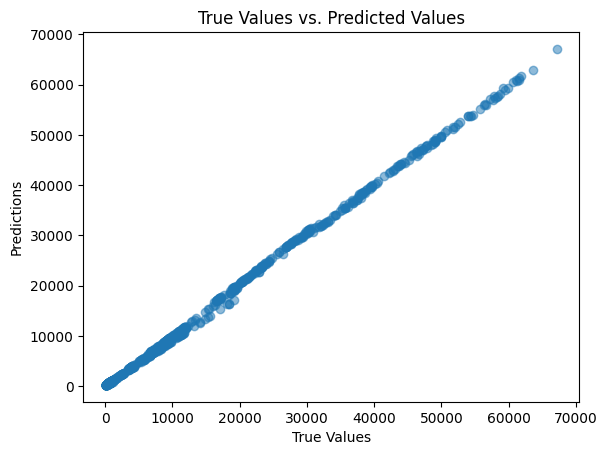

In [385]:
import matplotlib.pyplot as plt

# Assuming you have the true target values for the test data (ground truth) in 'y_test'
# Assuming 'predictions' contains the predicted values for the new data

# Create a scatter plot to compare the true values with the predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values')
plt.show()


Raíz del error cuadrático medio en Train: 0.0
Raíz del error cuadrático medio en Test: 0.0


C:\Users\Luca\AppData\Local\Temp\ipykernel_14420\950446082.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train, bins = 20, label = 'train', color = 'r', kde = True)
d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Luca\AppData\Local\Temp\ipykernel_14420\950446082.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

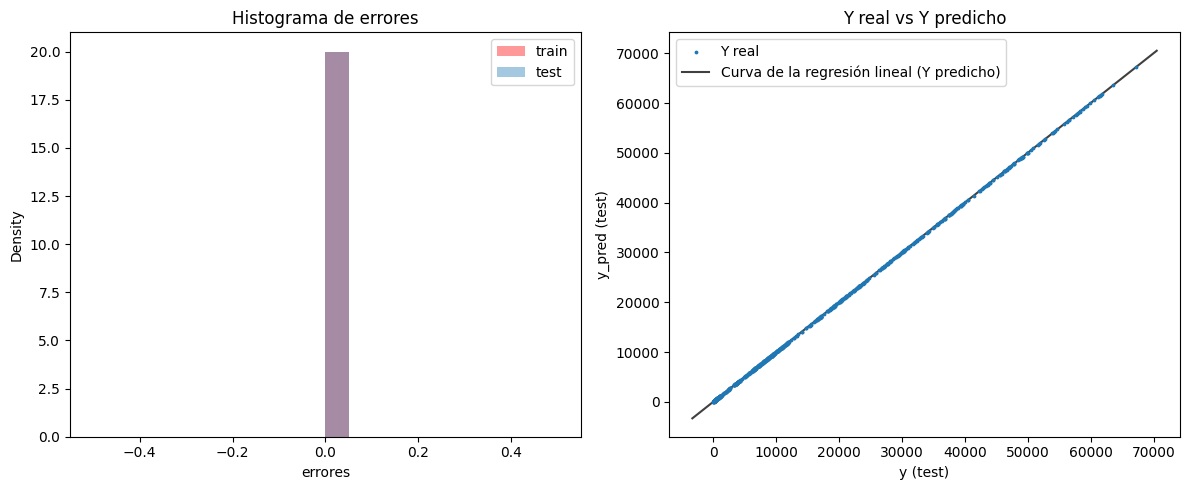

In [386]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 


import seaborn as sns


rmse_train = (mean_squared_error(y_train, y_train, squared = False))
rmse_test = (mean_squared_error(y_test, y_test, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_test, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

_____________________________________________

# ok, wait, if we add some dimensions..?

In [387]:
# Paso 1: Seleccionar solo las columnas numéricas
numeric_columns = projected_df.select_dtypes(include='number')

# Paso 2 y 3: Calcular la diferencia y agregar las columnas adicionales
for column in numeric_columns:
    diff_column_name = column + '_diff'  # Nombre de la columna adicional
    projected_df[diff_column_name] = projected_df[column].diff()
    diff_column_name = column + '_incremento'  # Nombre de la columna adicional
    projected_df[diff_column_name] = projected_df[column].pct_change() * 100

In [388]:
projected_df

timestamp        prices   market_caps  total_volumes  days  \
0   2022-11-10 00:00:00  15742.444336  3.019638e+11   7.497868e+10     0   
1   2022-11-11 00:00:00  17594.923500  3.365972e+11   6.520067e+10     1   
2   2022-11-12 00:00:00  17080.215261  3.259211e+11   4.503033e+10     2   
3   2022-11-13 00:00:00  16797.987483  3.223306e+11   2.189400e+10     3   
4   2022-11-14 00:00:00  16344.342316  3.136056e+11   2.041162e+10     4   
..                  ...           ...           ...            ...   ...   
278 2023-08-14 13:26:13  34312.279082  6.541264e+11  -9.268704e+07   278   
279 2023-08-15 13:26:13  34349.479230  6.538405e+11   1.427615e+10   279   
280 2023-08-16 13:26:13  33218.956092  6.547245e+11   2.126887e+10   280   
281 2023-08-17 13:26:13  33539.174276  6.564874e+11   1.105144e+10   281   
282 2023-08-18 13:26:13  33674.332299  6.712113e+11   1.440021e+10   282   

     prices_diff  prices_incremento  market_caps_diff  market_caps_incremento  \
0            NaN                NaN               NaN                     NaN   
1    1852.479164          11.767418      3.463336e+10               11.469373   
2    -514.708240          -2.925322     -1.067610e+10               -3.171772   
3    -282.227778          -1.652367     -3.590504e+09               -1.101648   
4    -453.645167          -2.700592     -8.725022e+09               -2.706855   
..           ...                ...               ...                     ...   
278   233.350956           0.684737      1.147058e+10                1.784871   
279    37.200148           0.108416     -2.859216e+08               -0.043710   
280 -1130.523138          -3.291238      8.839883e+08                0.135199   
281   320.218184           0.963962      1.762975e+09                0.269270   
282   135.158023           0.402986      1.472387e+10                2.242826   

     total_volumes_diff  total_volumes_incremento  days_diff  days_incremento  
0                   NaN                       NaN        NaN              NaN  
1         -9.778009e+09                -13.041053        1.0              inf  
2         -2.017034e+10                -30.935781        1.0       100.000000  
3         -2.313633e+10                -51.379445        1.0        50.000000  
4         -1.482378e+09                 -6.770705        1.0        33.333333  
..                  ...                       ...        ...              ...  
278       -6.994765e+09               -101.342886        1.0         0.361011  
279        1.436884e+10             -15502.531898        1.0         0.359712  
280        6.992724e+09                 48.981860        1.0         0.358423  
281       -1.021744e+10                -48.039393        1.0         0.357143  
282        3.348778e+09                 30.301743        1.0         0.355872  

[283 rows x 13 columns]

In [389]:
projected_df.fillna(0)

timestamp        prices   market_caps  total_volumes  days  \
0   2022-11-10 00:00:00  15742.444336  3.019638e+11   7.497868e+10     0   
1   2022-11-11 00:00:00  17594.923500  3.365972e+11   6.520067e+10     1   
2   2022-11-12 00:00:00  17080.215261  3.259211e+11   4.503033e+10     2   
3   2022-11-13 00:00:00  16797.987483  3.223306e+11   2.189400e+10     3   
4   2022-11-14 00:00:00  16344.342316  3.136056e+11   2.041162e+10     4   
..                  ...           ...           ...            ...   ...   
278 2023-08-14 13:26:13  34312.279082  6.541264e+11  -9.268704e+07   278   
279 2023-08-15 13:26:13  34349.479230  6.538405e+11   1.427615e+10   279   
280 2023-08-16 13:26:13  33218.956092  6.547245e+11   2.126887e+10   280   
281 2023-08-17 13:26:13  33539.174276  6.564874e+11   1.105144e+10   281   
282 2023-08-18 13:26:13  33674.332299  6.712113e+11   1.440021e+10   282   

     prices_diff  prices_incremento  market_caps_diff  market_caps_incremento  \
0       0.000000           0.000000      0.000000e+00                0.000000   
1    1852.479164          11.767418      3.463336e+10               11.469373   
2    -514.708240          -2.925322     -1.067610e+10               -3.171772   
3    -282.227778          -1.652367     -3.590504e+09               -1.101648   
4    -453.645167          -2.700592     -8.725022e+09               -2.706855   
..           ...                ...               ...                     ...   
278   233.350956           0.684737      1.147058e+10                1.784871   
279    37.200148           0.108416     -2.859216e+08               -0.043710   
280 -1130.523138          -3.291238      8.839883e+08                0.135199   
281   320.218184           0.963962      1.762975e+09                0.269270   
282   135.158023           0.402986      1.472387e+10                2.242826   

     total_volumes_diff  total_volumes_incremento  days_diff  days_incremento  
0          0.000000e+00                  0.000000        0.0         0.000000  
1         -9.778009e+09                -13.041053        1.0              inf  
2         -2.017034e+10                -30.935781        1.0       100.000000  
3         -2.313633e+10                -51.379445        1.0        50.000000  
4         -1.482378e+09                 -6.770705        1.0        33.333333  
..                  ...                       ...        ...              ...  
278       -6.994765e+09               -101.342886        1.0         0.361011  
279        1.436884e+10             -15502.531898        1.0         0.359712  
280        6.992724e+09                 48.981860        1.0         0.358423  
281       -1.021744e+10                -48.039393        1.0         0.357143  
282        3.348778e+09                 30.301743        1.0         0.355872  

[283 rows x 13 columns]

In [390]:
projected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 283 non-null    datetime64[ns]
 1   prices                    283 non-null    float64       
 2   market_caps               283 non-null    float64       
 3   total_volumes             283 non-null    float64       
 4   days                      283 non-null    int64         
 5   prices_diff               282 non-null    float64       
 6   prices_incremento         282 non-null    float64       
 7   market_caps_diff          282 non-null    float64       
 8   market_caps_incremento    282 non-null    float64       
 9   total_volumes_diff        282 non-null    float64       
 10  total_volumes_incremento  282 non-null    float64       
 11  days_diff                 282 non-null    float64       
 12  days_incremento       

In [391]:
# sns.pairplot(projected_df)

#### Las nuevas dimensiones creadas son viables y aportan informacion al ML ya que se pueden observar nuevas distribuciones normales agregadas y nuevas tendencias

In [392]:
projected_df.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
days                        0
prices_diff                 1
prices_incremento           1
market_caps_diff            1
market_caps_incremento      1
total_volumes_diff          1
total_volumes_incremento    1
days_diff                   1
days_incremento             1
dtype: int64

In [393]:
projected_df = projected_df.fillna(0)

In [394]:
import missingno as msno

In [396]:
projected_df = projected_df.drop_duplicates()

In [397]:
projected_df.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
days                        0
prices_diff                 0
prices_incremento           0
market_caps_diff            0
market_caps_incremento      0
total_volumes_diff          0
total_volumes_incremento    0
days_diff                   0
days_incremento             0
dtype: int64

In [398]:
projected_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 283 non-null    datetime64[ns]
 1   prices                    283 non-null    float64       
 2   market_caps               283 non-null    float64       
 3   total_volumes             283 non-null    float64       
 4   days                      283 non-null    int64         
 5   prices_diff               283 non-null    float64       
 6   prices_incremento         283 non-null    float64       
 7   market_caps_diff          283 non-null    float64       
 8   market_caps_incremento    283 non-null    float64       
 9   total_volumes_diff        283 non-null    float64       
 10  total_volumes_incremento  283 non-null    float64       
 11  days_diff                 283 non-null    float64       
 12  days_incremento       

#### Los datos eliminados corresponden a datos muy vejos, como el msno muestra. no hay problema con dropearlos..

<Axes: >

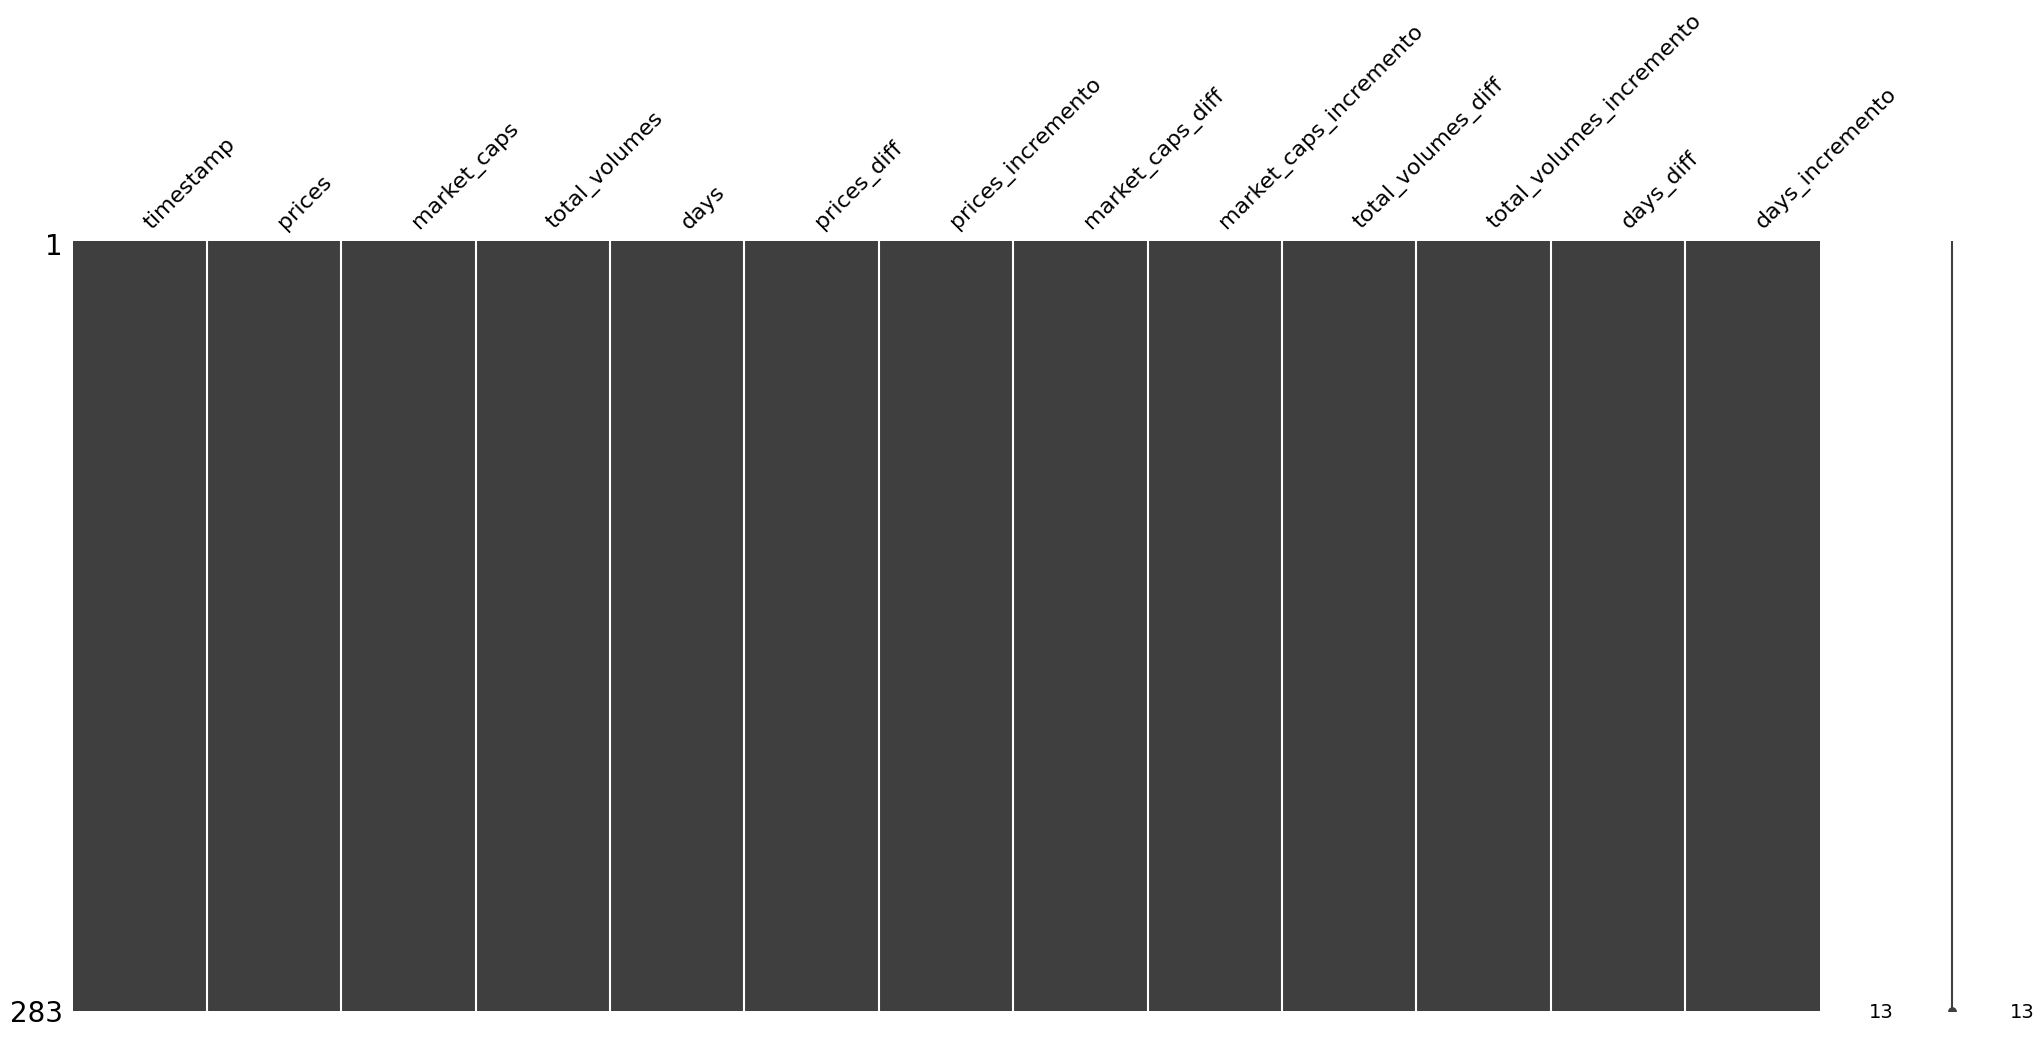

In [399]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(projected_df)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


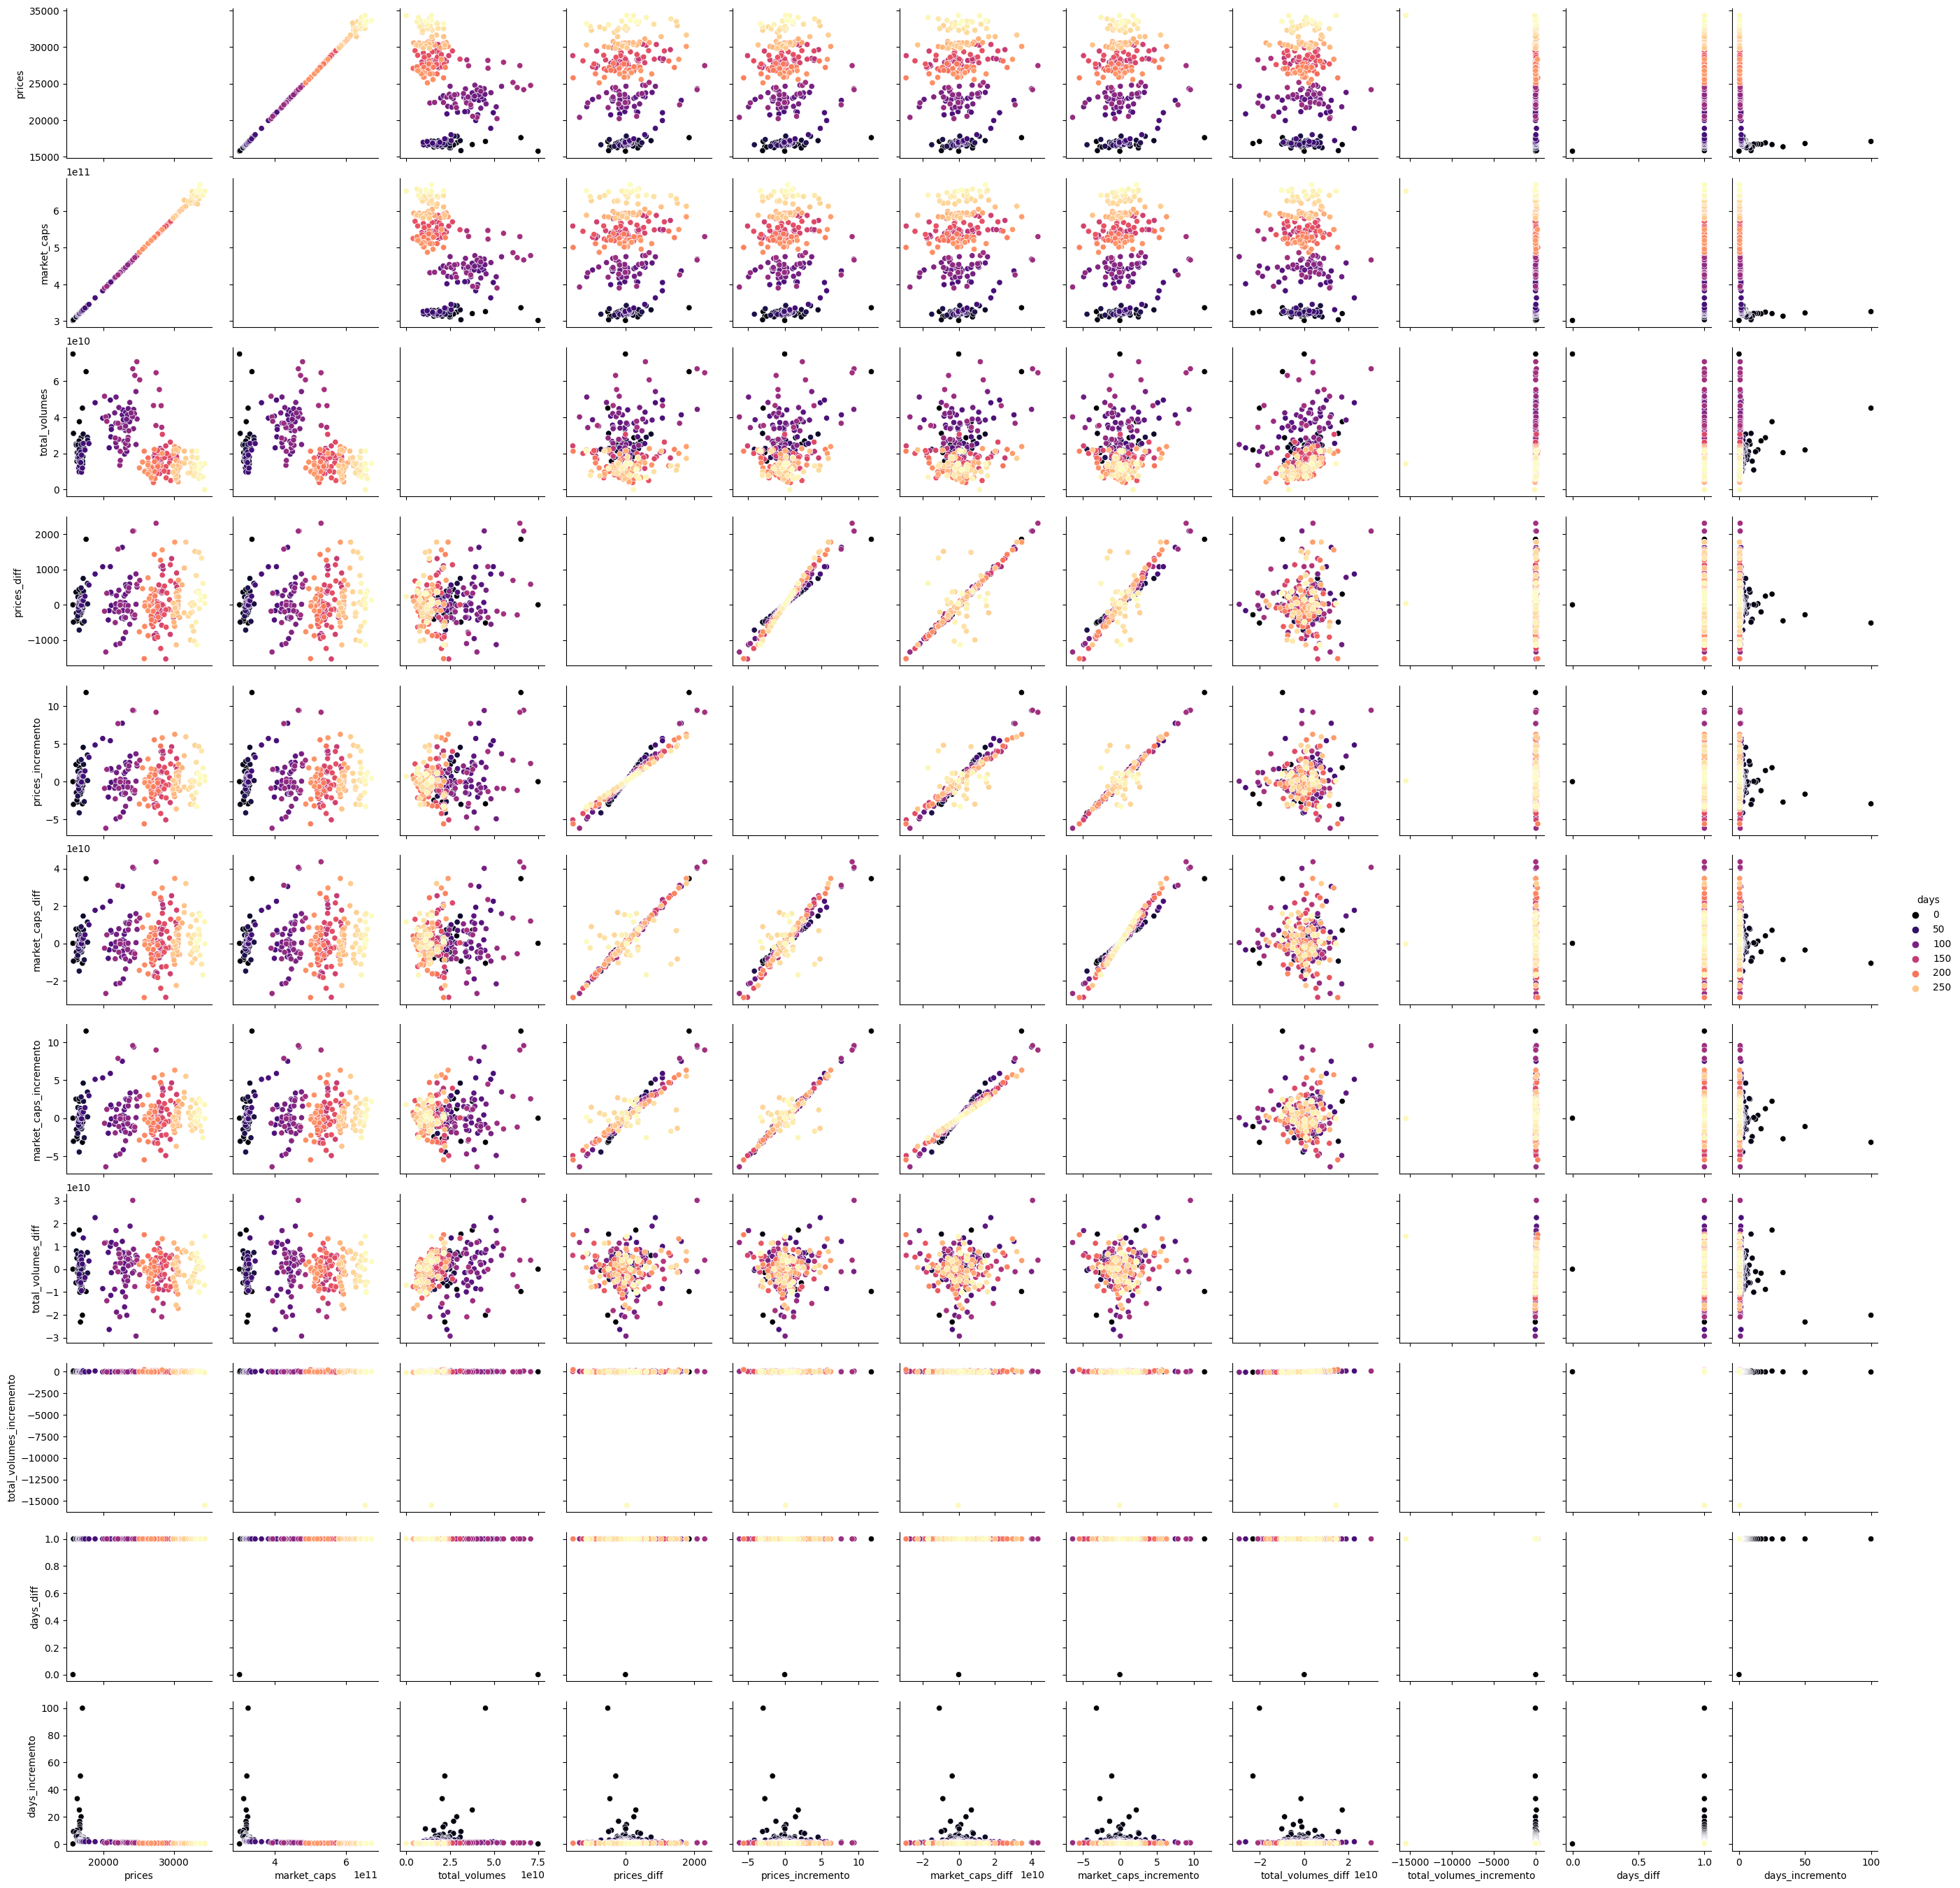

In [400]:
sns.pairplot(projected_df, hue= 'days', palette='magma')

In [401]:
projected_df.describe()

timestamp        prices   market_caps  \
count                            283    283.000000  2.830000e+02   
mean   2023-03-30 22:50:34.498233088  24986.875370  4.831946e+11   
min              2022-11-10 00:00:00  15742.444336  3.019638e+11   
25%              2023-01-19 12:00:00  20936.218592  4.034537e+11   
50%              2023-03-31 00:00:00  26501.044442  5.142794e+11   
75%              2023-06-09 12:00:00  29351.025606  5.683337e+11   
max              2023-08-18 13:26:13  34349.479230  6.712113e+11   
std                              NaN   5455.111830  1.068518e+11   

       total_volumes        days  prices_diff  prices_incremento  \
count   2.830000e+02  283.000000   283.000000         283.000000   
mean    2.144258e+10  141.000000    63.363562           0.297904   
min    -9.268704e+07    0.000000 -1532.686666          -6.154620   
25%     1.196824e+10   70.500000  -220.685009          -0.932932   
50%     1.771967e+10  141.000000    -6.217153          -0.023989   
75%     2.605788e+10  211.500000   325.768726           1.296978   
max     7.497868e+10  282.000000  2305.405812          11.767418   
std     1.325806e+10   81.839273   595.234559           2.430195   

       market_caps_diff  market_caps_incremento  total_volumes_diff  \
count      2.830000e+02              283.000000        2.830000e+02   
mean       1.304761e+09                0.310139       -2.140582e+08   
min       -2.903620e+10               -6.398268       -2.930026e+10   
25%       -4.322479e+09               -0.951487       -4.222651e+09   
50%        2.062819e+06                0.000347        1.559756e+08   
75%        6.560407e+09                1.287104        4.098108e+09   
max        4.366262e+10               11.469373        3.015926e+10   
std        1.104044e+10                2.371381        7.697567e+09   

       total_volumes_incremento   days_diff  days_incremento  
count                283.000000  283.000000       283.000000  
mean                 -48.285604    0.996466              inf  
min               -15502.531898    0.000000         0.000000  
25%                  -18.335101    1.000000         0.472816  
50%                    0.477080    1.000000         0.709220  
75%                   27.111659    1.000000         1.418511  
max                  247.790667    1.000000              inf  
std                  922.918093    0.059444              NaN

In [402]:
projected_df.tail()


timestamp        prices   market_caps  total_volumes  days  \
278 2023-08-14 13:26:13  34312.279082  6.541264e+11  -9.268704e+07   278   
279 2023-08-15 13:26:13  34349.479230  6.538405e+11   1.427615e+10   279   
280 2023-08-16 13:26:13  33218.956092  6.547245e+11   2.126887e+10   280   
281 2023-08-17 13:26:13  33539.174276  6.564874e+11   1.105144e+10   281   
282 2023-08-18 13:26:13  33674.332299  6.712113e+11   1.440021e+10   282   

     prices_diff  prices_incremento  market_caps_diff  market_caps_incremento  \
278   233.350956           0.684737      1.147058e+10                1.784871   
279    37.200148           0.108416     -2.859216e+08               -0.043710   
280 -1130.523138          -3.291238      8.839883e+08                0.135199   
281   320.218184           0.963962      1.762975e+09                0.269270   
282   135.158023           0.402986      1.472387e+10                2.242826   

     total_volumes_diff  total_volumes_incremento  days_diff  days_incremento  
278       -6.994765e+09               -101.342886        1.0         0.361011  
279        1.436884e+10             -15502.531898        1.0         0.359712  
280        6.992724e+09                 48.981860        1.0         0.358423  
281       -1.021744e+10                -48.039393        1.0         0.357143  
282        3.348778e+09                 30.301743        1.0         0.355872

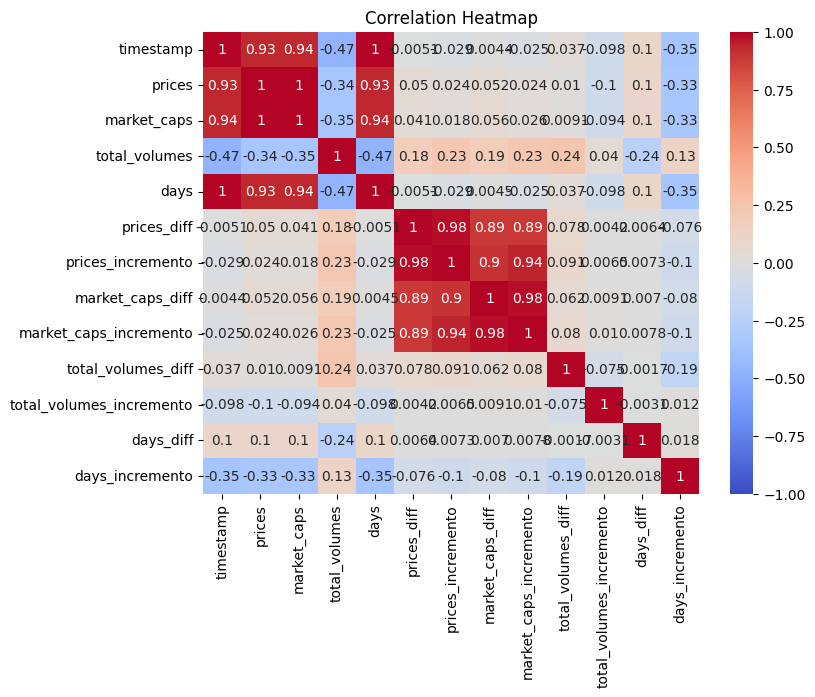

                          timestamp    prices  market_caps  total_volumes  \
timestamp                  1.000000  0.934455     0.936817      -0.469338   
prices                     0.934455  1.000000     0.999323      -0.344458   
market_caps                0.936817  0.999323     1.000000      -0.347628   
total_volumes             -0.469338 -0.344458    -0.347628       1.000000   
days                       0.999999  0.934468     0.936826      -0.469331   
prices_diff               -0.005149  0.049724     0.041236       0.183296   
prices_incremento         -0.029315  0.024380     0.017556       0.227035   
market_caps_diff           0.004409  0.052368     0.056153       0.185829   
market_caps_incremento    -0.024669  0.023670     0.026006       0.229371   
total_volumes_diff         0.036876  0.010375     0.009100       0.241590   
total_volumes_incremento  -0.097664 -0.101112    -0.093998       0.040450   
days_diff                  0.102837  0.101093     0.101180      -0.240886   

In [403]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = projected_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

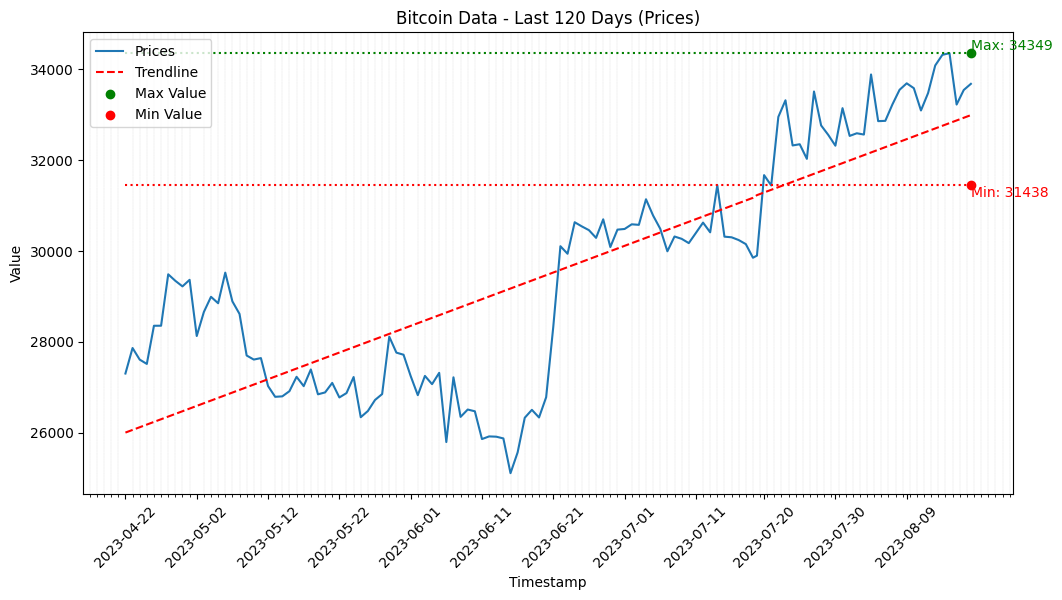

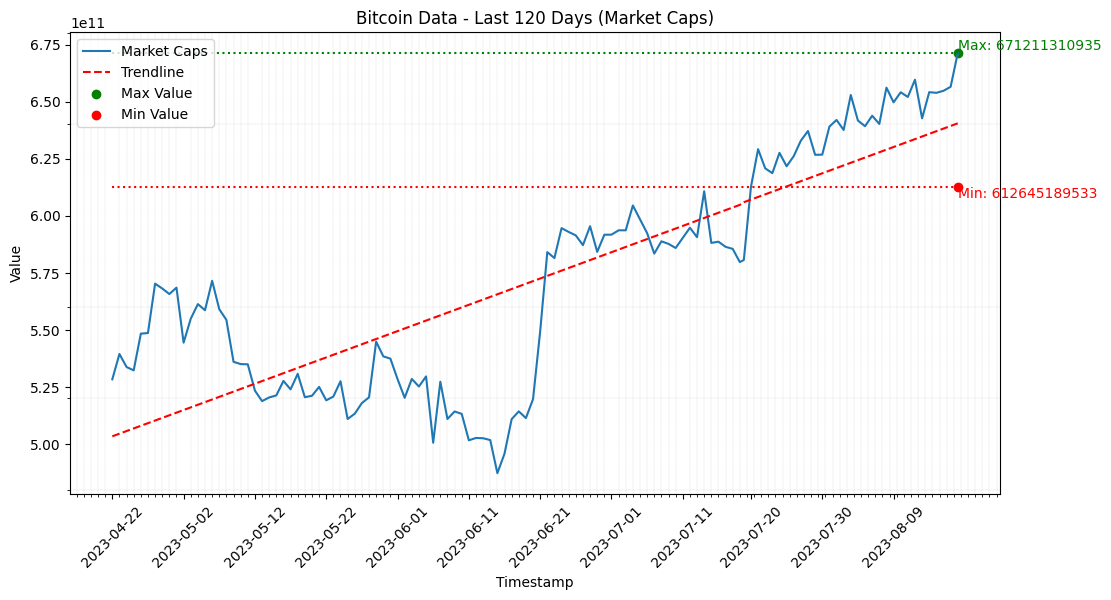

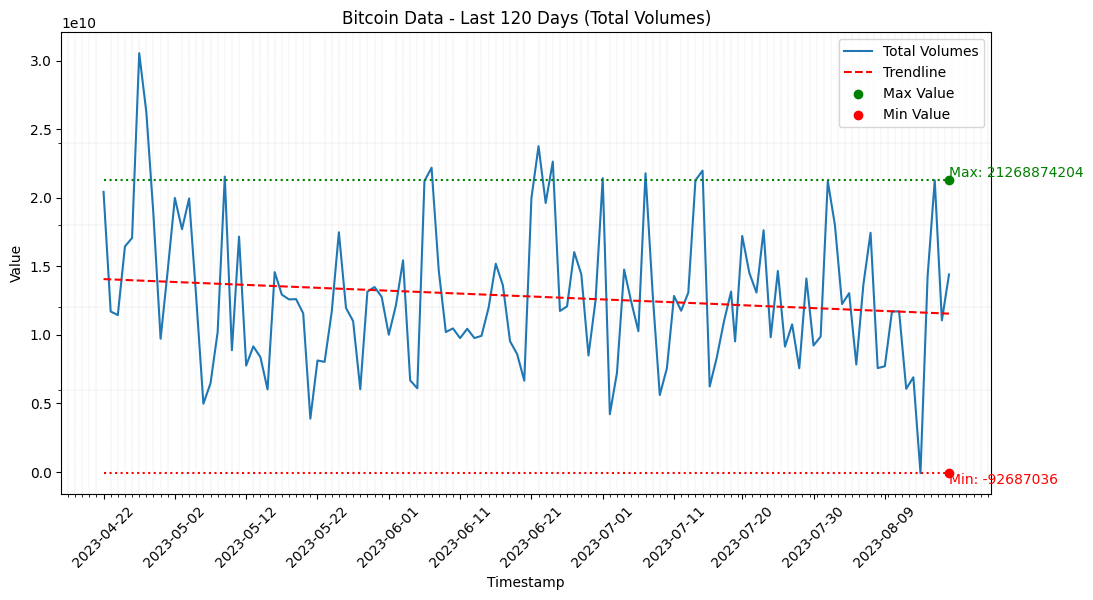

In [404]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()

# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de market_caps
plt.show()

# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de total_volumes
plt.show()


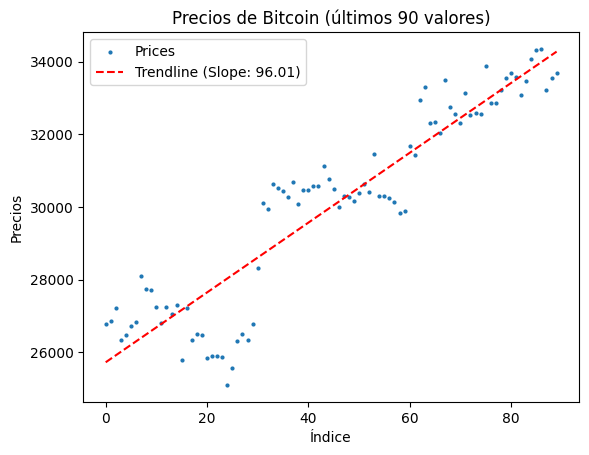

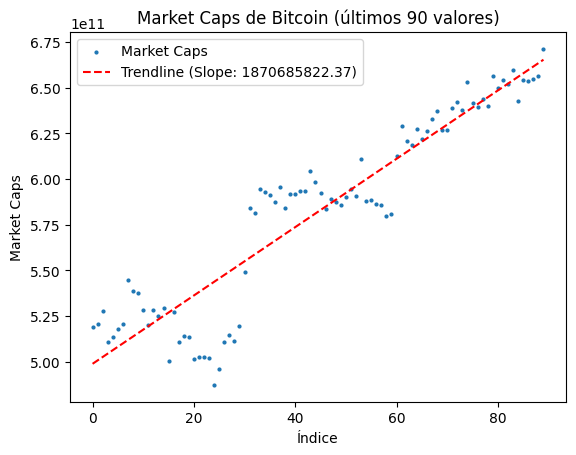

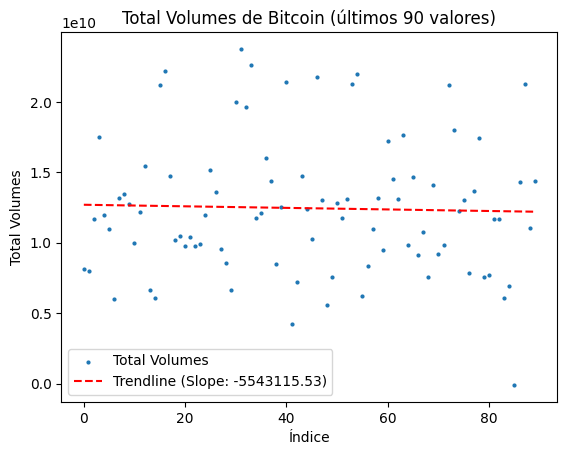

In [405]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 90 valores de los DataFrames
last_90_prices = projected_df['prices'].tail(90)
last_90_market_caps = projected_df['market_caps'].tail(90)
last_90_total_volumes = projected_df['total_volumes'].tail(90)

# Crear un rango de índices para los últimos 90 valores
indices = range(len(last_90_prices))

# Graficar los valores de precios
plt.scatter(indices, last_90_prices, s=4, label='Prices')

# Calcular la pendiente de los precios
slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
slope_prices_str = '{:.2f}'.format(slope_prices)

# Graficar la línea de tendencia de los precios
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

plt.title("Precios de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Precios")
plt.legend()
plt.show()

# Graficar los valores de market_caps
plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# Calcular la pendiente de los market_caps
slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# Graficar la línea de tendencia de los market_caps
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

plt.title("Market Caps de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Market Caps")
plt.legend()
plt.show()

# Graficar los valores de total_volumes
plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# Calcular la pendiente de los total_volumes
slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# Graficar la línea de tendencia de los total_volumes
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Total Volumes")
plt.legend()
plt.show()

__________________________________________

# Linear regresion con transpuesta.

In [406]:
df_bit.tail(100)

timestamp        prices   market_caps  total_volumes
3634 2023-04-12 00:00:00  30260.936109  5.853593e+11   1.832030e+10
3635 2023-04-13 00:00:00  29904.138695  5.788506e+11   1.840770e+10
3636 2023-04-14 00:00:00  30405.027313  5.879390e+11   1.640403e+10
3637 2023-04-15 00:00:00  30468.408701  5.890514e+11   2.098407e+10
3638 2023-04-16 00:00:00  30312.161880  5.869698e+11   1.102826e+10
...                  ...           ...           ...            ...
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09

[100 rows x 4 columns]

____________________________________________________________________

# Intento linear Regresion con transpuesta:

## ok, wait, if we add some dimensions..?

In [407]:
# Paso 1: Seleccionar solo las columnas numéricas
numeric_columns = df_bit.select_dtypes(include='number')

# Paso 2 y 3: Calcular la diferencia y agregar las columnas adicionales
for column in numeric_columns:
    diff_column_name = column + '_diff'  # Nombre de la columna adicional
    df_bit[diff_column_name] = df_bit[column].diff()
    diff_column_name = column + '_incremento'  # Nombre de la columna adicional
    df_bit[diff_column_name] = df_bit[column].pct_change() * 100

In [408]:
df_bit

timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10   
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09   

      prices_diff  prices_incremento  market_caps_diff  \
0             NaN                NaN               NaN   
1        6.660000           4.922395      7.451441e+07   
2       -6.660000          -4.691462     -7.337451e+07   
3      -18.300000         -13.525499     -2.027059e+08   
4      -13.570000         -11.598291     -1.502838e+08   
...           ...                ...               ...   
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -299.827807          -0.994524     -5.792107e+09   
3733    46.449308           0.155619      9.274836e+08   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
0                        NaN                 NaN                       NaN  
1                   4.965914        0.000000e+00                       NaN  
2                  -4.658604        0.000000e+00                       NaN  
3                 -13.498813        0.000000e+00                       NaN  
4                 -11.569625        0.000000e+00                       NaN  
...                      ...                 ...                       ...  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.989257        2.178375e+09                 19.849636  
3733                0.159991       -3.637704e+09                -27.657343  

[3733 rows x 10 columns]

In [409]:
df_bit.fillna(0)

timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10   
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09   

      prices_diff  prices_incremento  market_caps_diff  \
0        0.000000           0.000000      0.000000e+00   
1        6.660000           4.922395      7.451441e+07   
2       -6.660000          -4.691462     -7.337451e+07   
3      -18.300000         -13.525499     -2.027059e+08   
4      -13.570000         -11.598291     -1.502838e+08   
...           ...                ...               ...   
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -299.827807          -0.994524     -5.792107e+09   
3733    46.449308           0.155619      9.274836e+08   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
0                   0.000000        0.000000e+00                  0.000000  
1                   4.965914        0.000000e+00                  0.000000  
2                  -4.658604        0.000000e+00                  0.000000  
3                 -13.498813        0.000000e+00                  0.000000  
4                 -11.569625        0.000000e+00                  0.000000  
...                      ...                 ...                       ...  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.989257        2.178375e+09                 19.849636  
3733                0.159991       -3.637704e+09                -27.657343  

[3733 rows x 10 columns]

In [410]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 3733
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 3733 non-null   datetime64[ns]
 1   prices                    3733 non-null   float64       
 2   market_caps               3733 non-null   float64       
 3   total_volumes             3733 non-null   float64       
 4   prices_diff               3732 non-null   float64       
 5   prices_incremento         3732 non-null   float64       
 6   market_caps_diff          3732 non-null   float64       
 7   market_caps_incremento    3732 non-null   float64       
 8   total_volumes_diff        3732 non-null   float64       
 9   total_volumes_incremento  3491 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 449.8 KB


In [411]:
# sns.pairplot(projected_df)

#### Las nuevas dimensiones creadas son viables y aportan informacion al ML ya que se pueden observar nuevas distribuciones normales agregadas y nuevas tendencias

In [412]:
df_bit.isnull().sum()

timestamp                     0
prices                        0
market_caps                   0
total_volumes                 0
prices_diff                   1
prices_incremento             1
market_caps_diff              1
market_caps_incremento        1
total_volumes_diff            1
total_volumes_incremento    242
dtype: int64

In [413]:
df_bit = df_bit.fillna(0)

In [414]:
import missingno as msno

In [416]:
df_bit = df_bit.drop_duplicates()

In [417]:
df_bit.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
prices_diff                 0
prices_incremento           0
market_caps_diff            0
market_caps_incremento      0
total_volumes_diff          0
total_volumes_incremento    0
dtype: int64

In [418]:
df_bit.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 3733
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 3733 non-null   datetime64[ns]
 1   prices                    3733 non-null   float64       
 2   market_caps               3733 non-null   float64       
 3   total_volumes             3733 non-null   float64       
 4   prices_diff               3733 non-null   float64       
 5   prices_incremento         3733 non-null   float64       
 6   market_caps_diff          3733 non-null   float64       
 7   market_caps_incremento    3733 non-null   float64       
 8   total_volumes_diff        3733 non-null   float64       
 9   total_volumes_incremento  3733 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 449.8 KB


#### Los datos eliminados corresponden a datos muy vejos, como el msno muestra. no hay problema con dropearlos..

<Axes: >

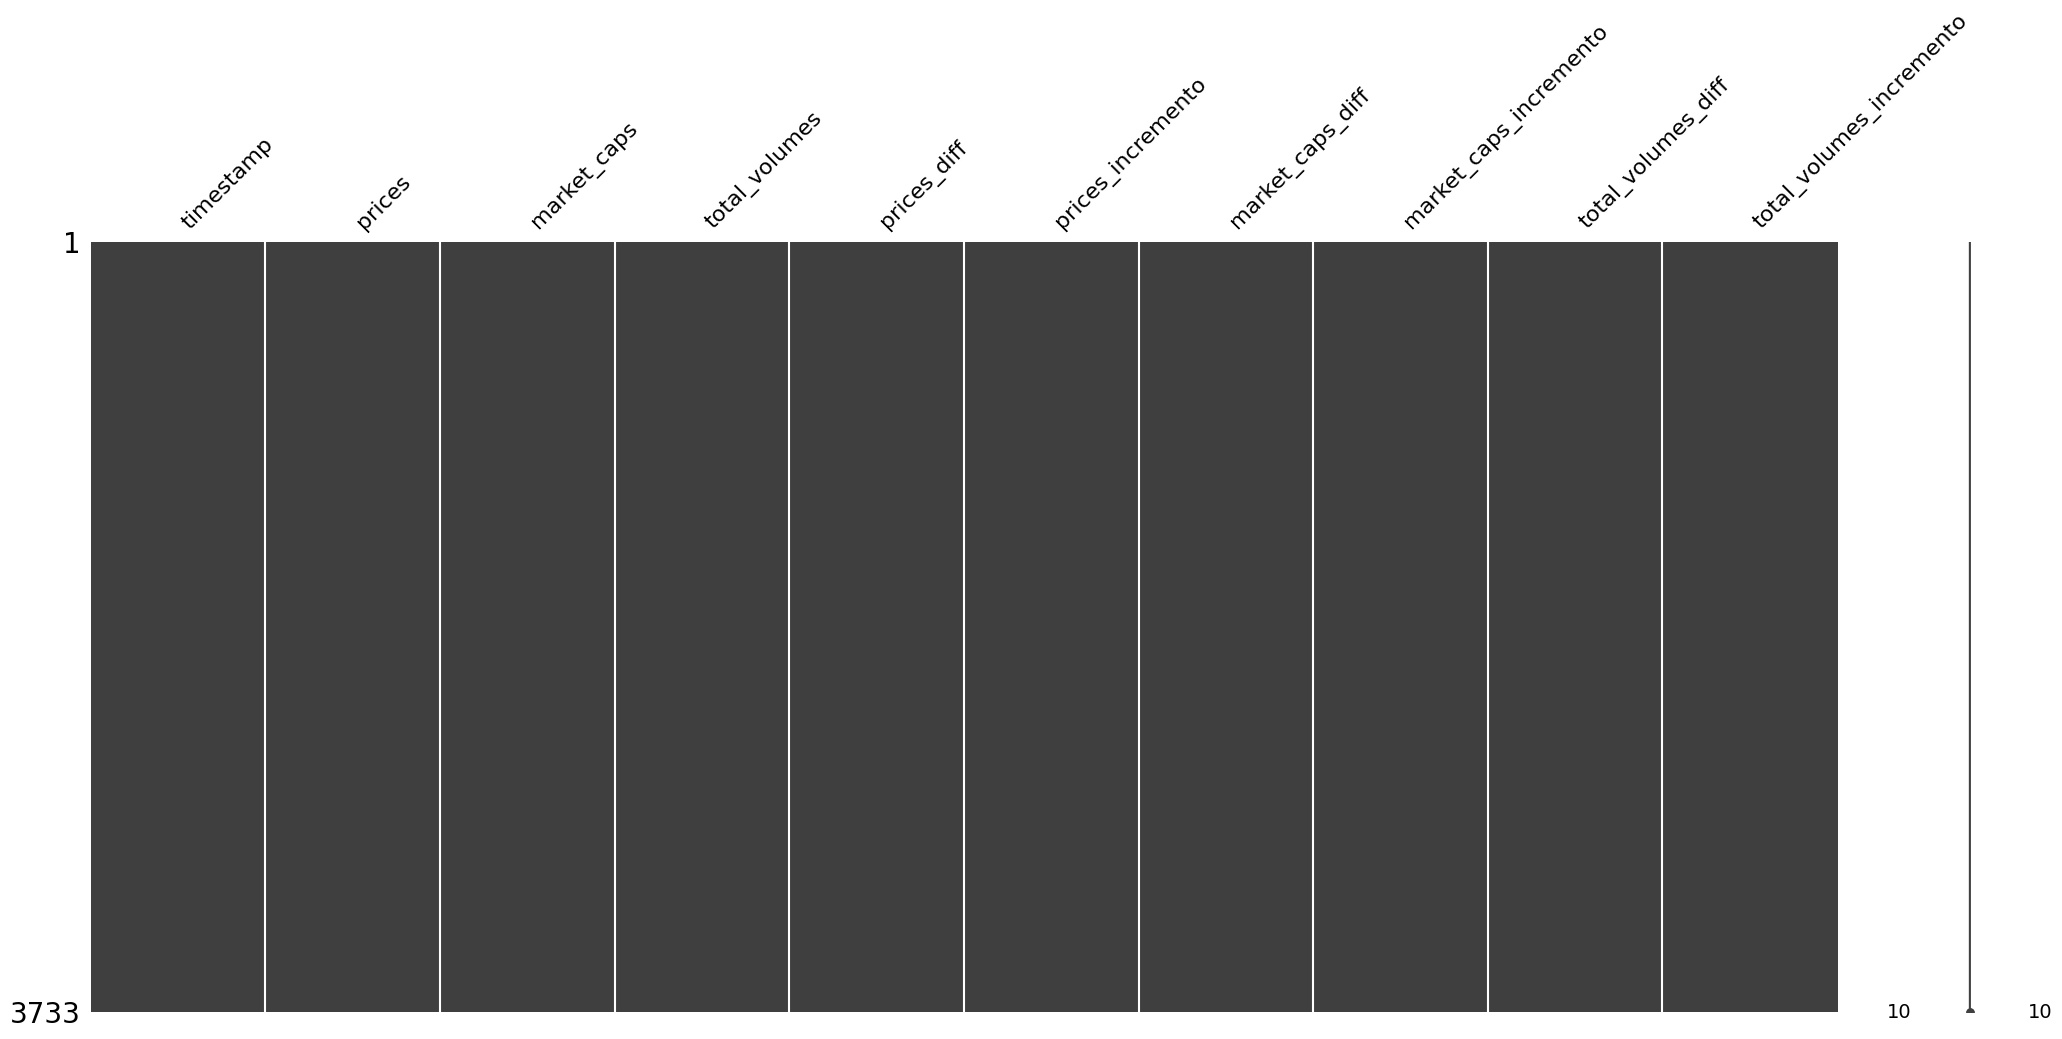

In [419]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(df_bit)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


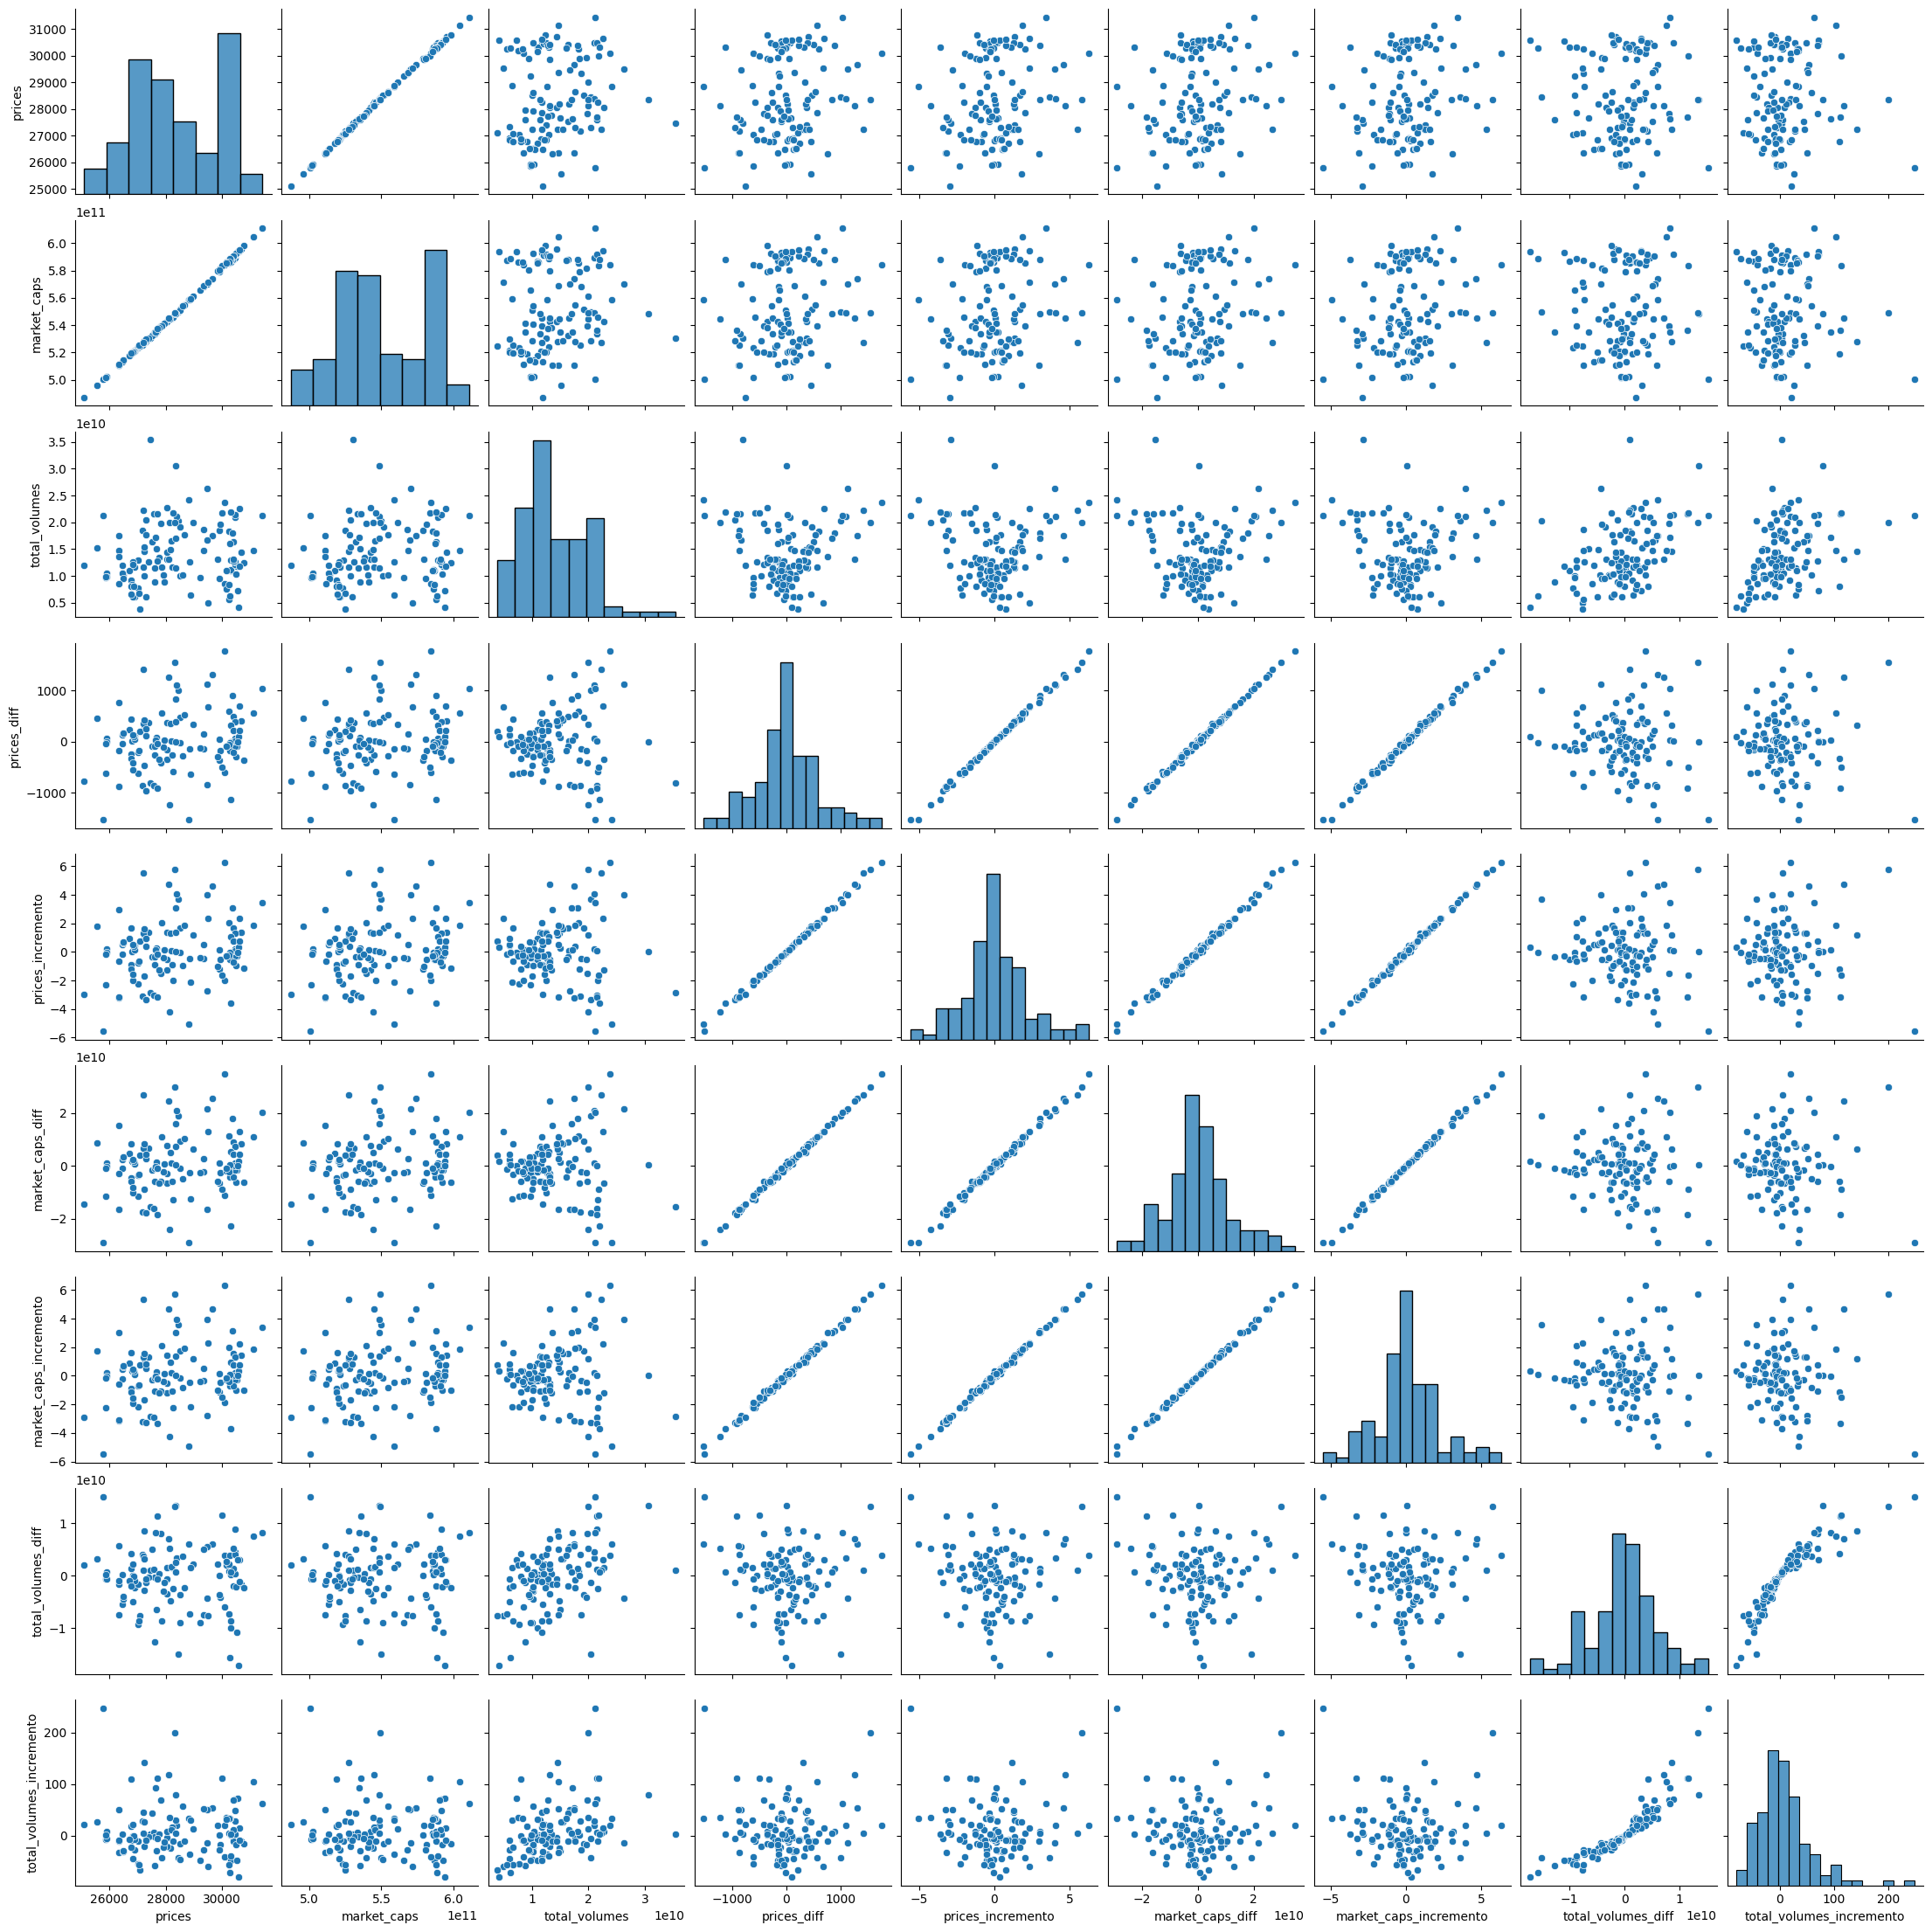

In [420]:
sns.pairplot(df_bit.iloc[-120:,:])

In [421]:
df_bit.describe()

timestamp        prices   market_caps  \
count                           3733   3733.000000  3.733000e+03   
mean   2018-06-09 10:27:02.817395456  11889.958074  2.208372e+11   
min              2013-04-28 00:00:00     67.809000  7.713681e+08   
25%              2015-11-19 00:00:00    567.381062  7.304054e+09   
50%              2018-06-10 00:00:00   6328.554760  1.091672e+11   
75%              2020-12-29 00:00:00  17106.505149  3.253115e+11   
max              2023-07-19 13:26:13  67617.015545  1.278798e+12   
std                              NaN  15584.897614  2.953450e+11   

       total_volumes  prices_diff  prices_incremento  market_caps_diff  \
count   3.733000e+03  3733.000000        3733.000000      3.733000e+03   
mean    1.413437e+10     7.971921           0.225126      1.551395e+08   
min     0.000000e+00 -6924.210173         -35.190269     -1.294806e+11   
25%     1.305731e+08   -44.536235          -1.335277     -7.154431e+08   
50%     3.554701e+09     1.146300           0.157887      1.779014e+07   
75%     2.428211e+10    66.797500           1.828557      1.173037e+09   
max     1.788941e+11  7474.233857          33.255625      1.389789e+11   
std     1.843966e+10   733.209627           4.002899      1.365434e+10   

       market_caps_incremento  total_volumes_diff  total_volumes_incremento  
count             3733.000000        3.733000e+03               3733.000000  
mean                 0.240085        2.548903e+06                       inf  
min                -35.775702       -1.042369e+11                -99.592742  
25%                 -1.282662       -5.746703e+08                -15.406360  
50%                  0.184812        0.000000e+00                  0.000000  
75%                  1.828768        4.854660e+08                 16.265830  
max                 33.272357        1.216206e+11                       inf  
std                  4.000286        7.028627e+09                       NaN

In [422]:
df_bit.tail()

timestamp        prices   market_caps  total_volumes  \
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10   
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09   

      prices_diff  prices_incremento  market_caps_diff  \
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -299.827807          -0.994524     -5.792107e+09   
3733    46.449308           0.155619      9.274836e+08   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.989257        2.178375e+09                 19.849636  
3733                0.159991       -3.637704e+09                -27.657343

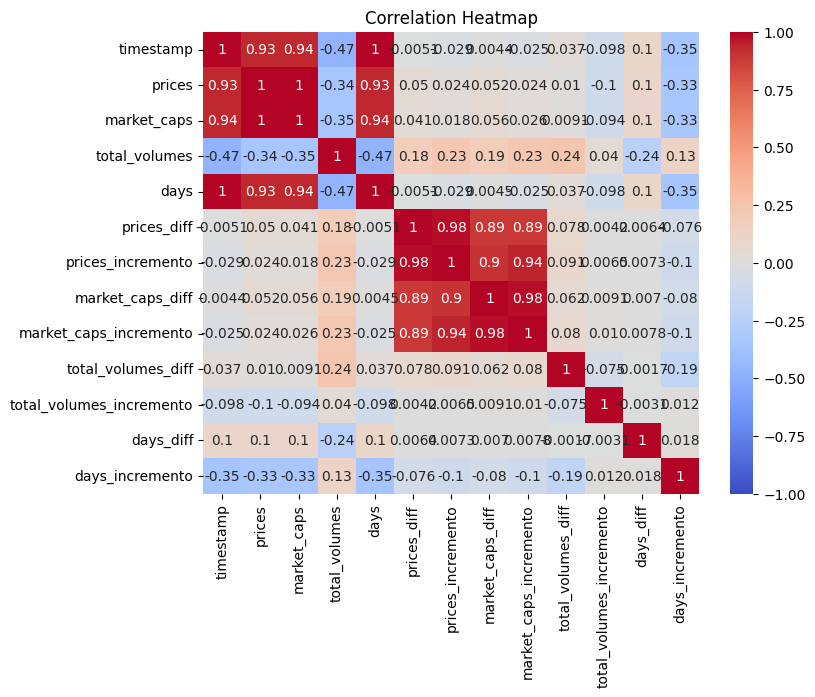

                          timestamp    prices  market_caps  total_volumes  \
timestamp                  1.000000  0.934455     0.936817      -0.469338   
prices                     0.934455  1.000000     0.999323      -0.344458   
market_caps                0.936817  0.999323     1.000000      -0.347628   
total_volumes             -0.469338 -0.344458    -0.347628       1.000000   
days                       0.999999  0.934468     0.936826      -0.469331   
prices_diff               -0.005149  0.049724     0.041236       0.183296   
prices_incremento         -0.029315  0.024380     0.017556       0.227035   
market_caps_diff           0.004409  0.052368     0.056153       0.185829   
market_caps_incremento    -0.024669  0.023670     0.026006       0.229371   
total_volumes_diff         0.036876  0.010375     0.009100       0.241590   
total_volumes_incremento  -0.097664 -0.101112    -0.093998       0.040450   
days_diff                  0.102837  0.101093     0.101180      -0.240886   

In [423]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = projected_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

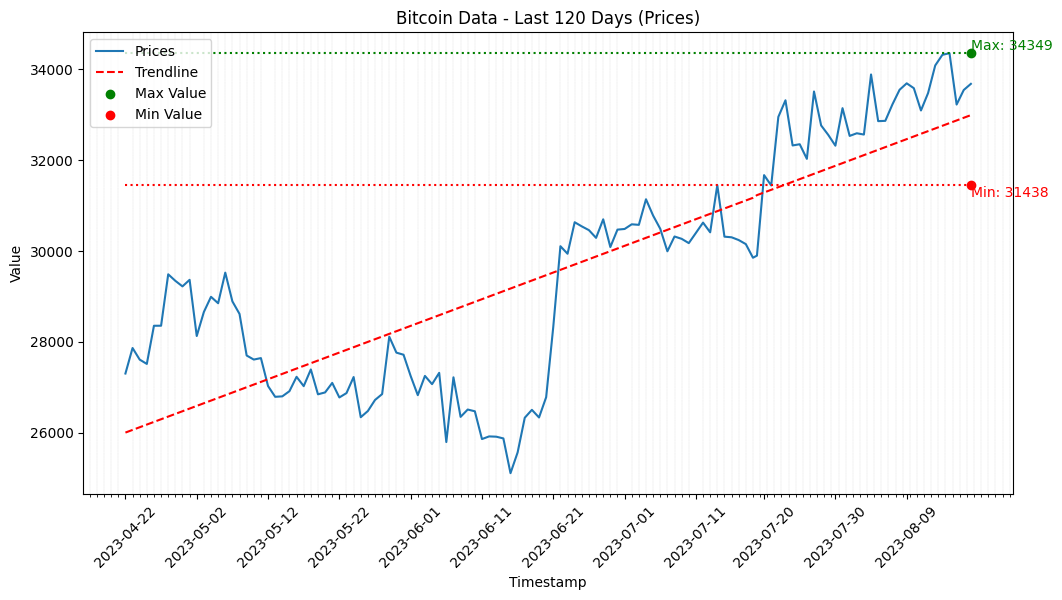

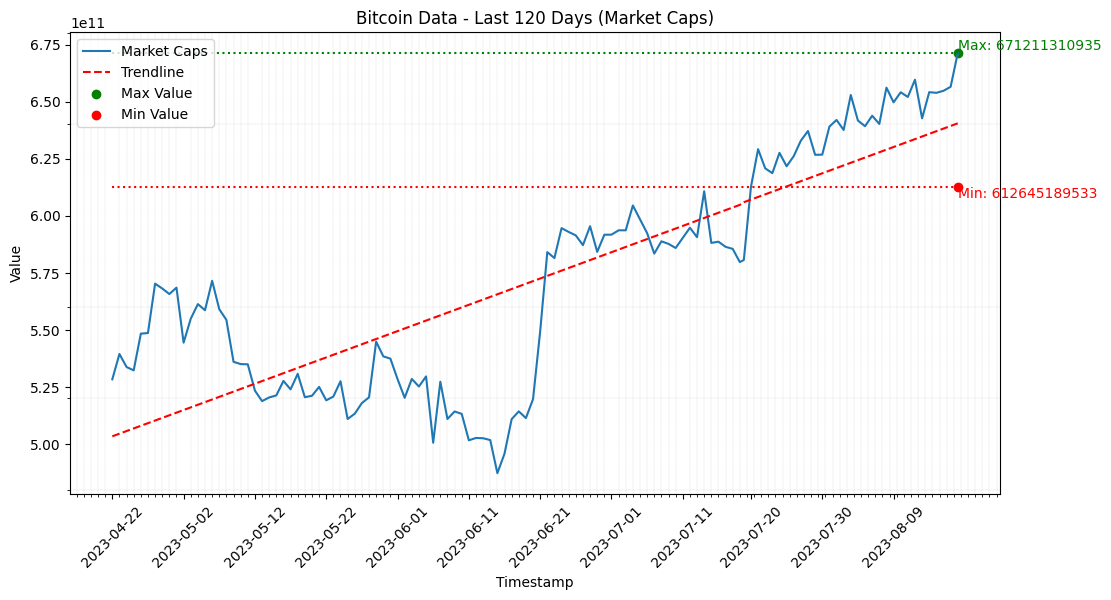

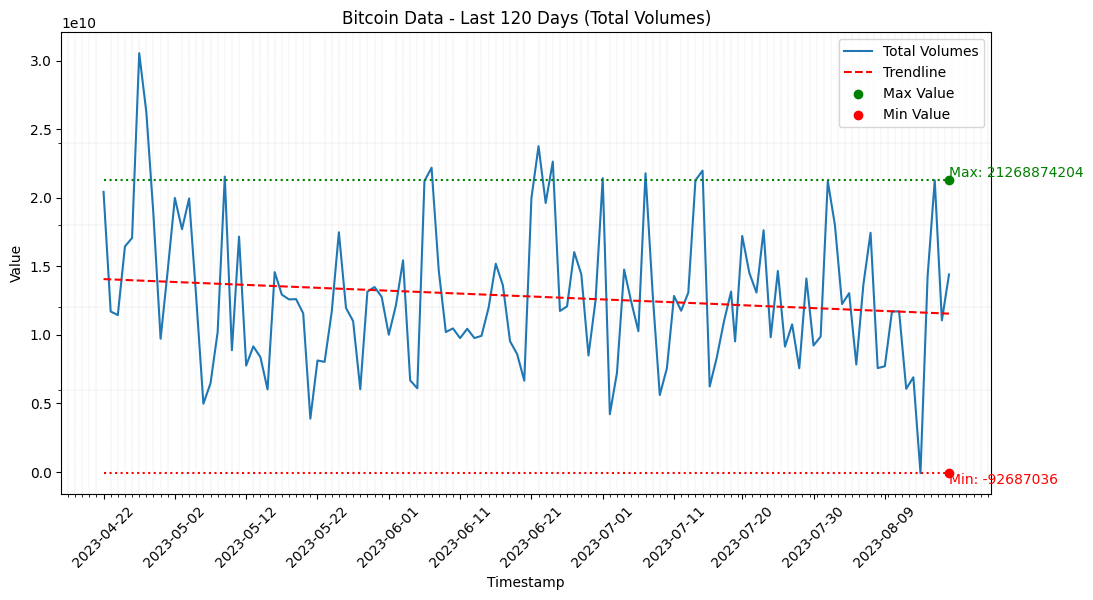

In [431]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')
# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)
# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()
# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')
# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# Activar la leyenda del gráfico de precios
ax.legend()
# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()
# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))
# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')
# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# # Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')
# # Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)
# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()
# # Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')
# # Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')
# # Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# # Activar la leyenda del gráfico de market_caps
ax.legend()
# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
# Mostrar el gráfico de market_caps
plt.show()
# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))
# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')
# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')
# # Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()
# # Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')
# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')
# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')
# # Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# # Activar la leyenda del gráfico de total_volumes
ax.legend()
# # Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
# # Mostrar el gráfico de total_volumes
plt.show()


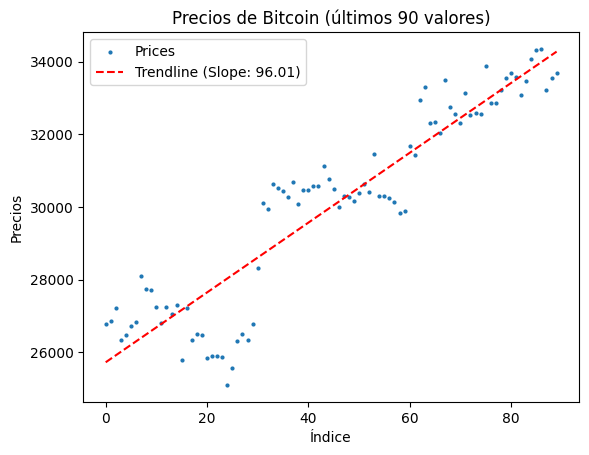

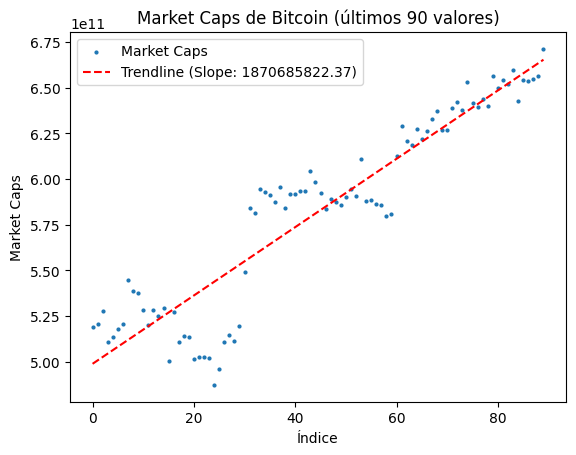

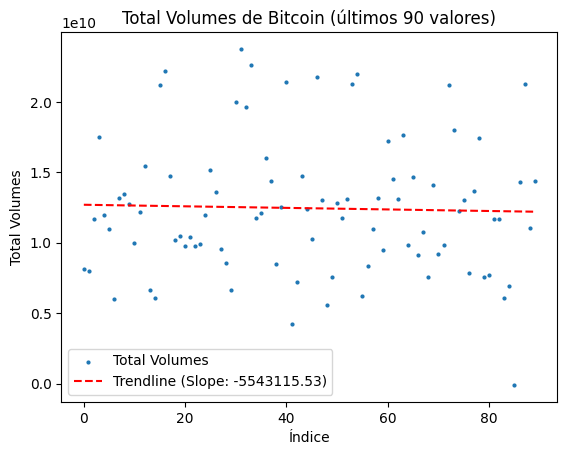

In [430]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 90 valores de los DataFrames
last_90_prices = projected_df['prices'].tail(90)
last_90_market_caps = projected_df['market_caps'].tail(90)
last_90_total_volumes = projected_df['total_volumes'].tail(90)

# Crear un rango de índices para los últimos 90 valores
indices = range(len(last_90_prices))

# Graficar los valores de precios
plt.scatter(indices, last_90_prices, s=4, label='Prices')

# Calcular la pendiente de los precios
slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
slope_prices_str = '{:.2f}'.format(slope_prices)

# Graficar la línea de tendencia de los precios
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

plt.title("Precios de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Precios")
plt.legend()
plt.show()

# Graficar los valores de market_caps
plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# Calcular la pendiente de los market_caps
slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# Graficar la línea de tendencia de los market_caps
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

plt.title("Market Caps de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Market Caps")
plt.legend()
plt.show()

# Graficar los valores de total_volumes
plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# Calcular la pendiente de los total_volumes
slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# Graficar la línea de tendencia de los total_volumes
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Total Volumes")
plt.legend()
plt.show()

__________________________________________

 ____ ______ _____ _____

_____________________________________________

_____________________________________________

_____________________________________________

_____________________________________________

_____________________________________________________________________________________

_____________________________________________________________________________________

_____________________________________________________________________________________

_____________________________________________________________________________________

# Otras pruebas; otra info input...

In [429]:
import requests
import pandas as pd

def get_historical_data(currency='usd', days=30):
    url = f'https://api.coingecko.com/api/v3/coins/bitcoin/ohlc'
    params = {
        'vs_currency': currency,
        'days': days,
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error al hacer la solicitud: {e}")
        return None

def create_dataframe(data):
    if data is None or len(data) == 0:
        return None

    df = pd.DataFrame(data, columns=['close_timestamp', 'open_price', 'high_price', 'low_price', 'close_price'])
    df['close_timestamp'] = pd.to_datetime(df['close_timestamp'], unit='ms')  # Convertir el timestamp a formato de fecha
    return df

if __name__ == "__main__":
    # Obtener datos históricos de los últimos 30 días en dólares estadounidenses (USD)
    historical_data = get_historical_data(currency='usd', days=30)

    if historical_data:
        df = create_dataframe(historical_data)
        if df is not None:
            print(df)
        else:
            print("No se pudo crear el DataFrame.")
    else:
        print("No se pudo obtener la información histórica de Bitcoin.")



        close_timestamp  open_price  high_price  low_price  close_price
0   2023-06-19 16:00:00     26524.0     26524.0    26415.0      26415.0
1   2023-06-19 20:00:00     26437.0     26823.0    26437.0      26823.0
2   2023-06-20 00:00:00     26646.0     26759.0    26646.0      26759.0
3   2023-06-20 04:00:00     26779.0     26946.0    26779.0      26910.0
4   2023-06-20 08:00:00     26892.0     26941.0    26793.0      26793.0
..                  ...         ...         ...        ...          ...
176 2023-07-19 00:00:00     29720.0     29815.0    29720.0      29815.0
177 2023-07-19 04:00:00     29848.0     30050.0    29848.0      30014.0
178 2023-07-19 08:00:00     30061.0     30174.0    30039.0      30039.0
179 2023-07-19 12:00:00     30034.0     30034.0    29949.0      29986.0
180 2023-07-19 16:00:00     29999.0     29999.0    29951.0      29951.0

[181 rows x 5 columns]
